In [179]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#######################################################
from scipy.stats import spearmanr

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score 

from xgboost import XGBClassifier
from sklearn import tree
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import accuracy_score

#from xgboost import XGBClassifier
#import xgboost as xgb
 


In [3]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [4]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [5]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [6]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [7]:
# Data Preperation Module 1
# m1ml,m1mg,
# Import first Lecturer Grades

#module1lg = pd.read_csv('Module1-LecturersGrades.csv',index_col = 'Student Id')
# Index column is student ID
# Student ID -> module1lg
module1lg = pd.read_csv('Module1-LecturersGrades.csv')

In [8]:
# module1mg = pd.read_csv('Module1-MoodleGrades.csv', index_col = 'ID number')
# ID number is primary index col

# Index column is privalged column in pandas providing conviement to series or dataframe rows
module1mg = pd.read_csv('Module1-MoodleGrades.csv')
# Module 1 mg has 4,5,6,7, MCQ Final

In [9]:
# Data prep Module 1
module1ml = pd.read_csv('Module1-MoodleLogs.csv')
# Module logs

In [10]:
module1lg['Final(Rounded Up)'].mean()

45.421052631578945

In [11]:
from scipy.stats.mstats import gmean

In [11]:
#gmean[('Final(Rounded Up)')]

In [12]:
#print(module1lg.isna().sum())

In [12]:
module1lg.dtypes
# id is int

id                     int64
Student Id            object
Name                  object
% CA                   int64
% exam                 int64
Average              float64
Final(Rounded Up)      int64
dtype: object

In [13]:
module1mg.dtypes
# Mostly floats and ints
# ID number to change to int

First name                                      object
Surname                                         object
ID number                                       object
Email address                                   object
Course total (Real)                            float64
Last downloaded from this course                 int64
Assignment: Group 1 - Practical Test (Real)      int64
Assignment: Group 2 - Practical Test (Real)      int64
Assignment: Group 3 - Practical Test (Real)      int64
Assignment: Group 4 - Practical Test (Real)      int64
Assignment: Group 5 - Practical Test (Real)      int64
Assignment: Group 6 - Practical Test (Real)      int64
Assignment: Group 7 - Practical Test (Real)      int64
Assignment: Late Practical (Real)                int64
Quiz: Group 1 MCQ (Real)                         int64
Quiz: Group 1 - MCQ2 (Real)                      int64
Quiz: Group 2 MCQ (Real)                         int64
Quiz: Group 2 - MCQ2 (Real)                      int64
Quiz: Grou

In [14]:
module1ml.dtypes
# Are all objects
# Need to split strings

Time              object
User full name    object
Affected user     object
Event context     object
Component         object
Event name        object
Description       object
Origin            object
IP address        object
dtype: object

In [15]:
# Engaged

#Engaged1mg = > 55
engaged1mg = module1mg['Course total (Real)'] > 55


In [16]:
engaged1mg.sum()

25

In [17]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
module1mg['engaged'] = np.where(module1mg['Course total (Real)']>=55, '1', '0')

In [18]:
module1mg['engaged'] = pd.to_numeric(module1mg['engaged'])


In [19]:
module1mg.dtypes

First name                                      object
Surname                                         object
ID number                                       object
Email address                                   object
Course total (Real)                            float64
Last downloaded from this course                 int64
Assignment: Group 1 - Practical Test (Real)      int64
Assignment: Group 2 - Practical Test (Real)      int64
Assignment: Group 3 - Practical Test (Real)      int64
Assignment: Group 4 - Practical Test (Real)      int64
Assignment: Group 5 - Practical Test (Real)      int64
Assignment: Group 6 - Practical Test (Real)      int64
Assignment: Group 7 - Practical Test (Real)      int64
Assignment: Late Practical (Real)                int64
Quiz: Group 1 MCQ (Real)                         int64
Quiz: Group 1 - MCQ2 (Real)                      int64
Quiz: Group 2 MCQ (Real)                         int64
Quiz: Group 2 - MCQ2 (Real)                      int64
Quiz: Grou

In [20]:
print (module1mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Course total (Real)', 'Last downloaded from this course', 'Assignment: Group 1 - Practical Test (Real)', 'Assignment: Group 2 - Practical Test (Real)', 'Assignment: Group 3 - Practical Test (Real)', 'Assignment: Group 4 - Practical Test (Real)', 'Assignment: Group 5 - Practical Test (Real)', 'Assignment: Group 6 - Practical Test (Real)', 'Assignment: Group 7 - Practical Test (Real)', 'Assignment: Late Practical (Real)', 'Quiz: Group 1 MCQ (Real)', 'Quiz: Group 1 - MCQ2 (Real)', 'Quiz: Group 2 MCQ (Real)', 'Quiz: Group 2 - MCQ2 (Real)', 'Quiz: Group 3 MCQ (Real)', 'Quiz: Group 3 - MCQ2 (Real)', 'Quiz: Group 4 MCQ (Real)', 'Quiz: Group 4 - MCQ2 (Real)', 'Quiz: Group 5 MCQ (Real)', 'Quiz: Group 5 - MCQ2 (Real)', 'Quiz: Group 6 MCQ (Real)', 'Quiz: Group 6 - MCQ2 (Real)', 'Quiz: Group 7 MCQ (Real)', 'Quiz: Group 7 - MCQ2 (Real)', 'Quiz: Late MCQ1 (Real)', 'Quiz: Late MCQ2 (Real)', 'engaged']


In [21]:
module1mg.head(2)

First name Surname ID number            Email address  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie                46.67   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie                36.67   

   Last downloaded from this course  \
0                        1550739556   
1                        1550739556   

   Assignment: Group 1 - Practical Test (Real)  \
0                                            0   
1                                            0   

   Assignment: Group 2 - Practical Test (Real)  \
0                                            0   
1                                            0   

   Assignment: Group 3 - Practical Test (Real)  \
0                                            0   
1                                            0   

   Assignment: Group 4 - Practical Test (Real)  ...  \
0                                            0  ...   
1                                            0  ...   

   Quiz: Group 4 - MCQ2 (Real)  Quiz: Group 5 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 5 - MCQ2 (Real)  Quiz: Group 6 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 6 - MCQ2 (Real)  Quiz: Group 7 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 7 - MCQ2 (Real)  Quiz: Late MCQ1 (Real)  \
0                            0                       0   
1                            0                       0   

   Quiz: Late MCQ2 (Real)  engaged  
0                       0        0  
1                       0        0  

[2 rows x 31 columns]

In [22]:
# Selecting columns
# Columns1mg
#m1mg = module1mg[[ 'First name', 'Surname','ID number','Course total (Real)','Quiz: Group 4 MCQ (Real)','Quiz: Group 5 MCQ (Real)','Quiz: Group 5 - MCQ2 (Real)','Quiz: Group 6 MCQ (Real)','Quiz: Group 6 - MCQ2 (Real)','Quiz: Group 7 MCQ (Real)','Quiz: Group 7 - MCQ2 (Real)','Quiz: Late MCQ1 (Real)','Quiz: Late MCQ2 (Real)']]


In [23]:
m1mg = module1mg[['First name', 'Surname','ID number','Course total (Real)','Quiz: Group 1 MCQ (Real)', 'Quiz: Group 1 - MCQ2 (Real)', 'Quiz: Group 2 MCQ (Real)', 'Quiz: Group 2 - MCQ2 (Real)', 'Quiz: Group 3 MCQ (Real)', 'Quiz: Group 3 - MCQ2 (Real)', 'Quiz: Group 4 MCQ (Real)','Quiz: Group 5 MCQ (Real)', 'Quiz: Group 5 - MCQ2 (Real)', 'Quiz: Group 6 MCQ (Real)', 'Quiz: Group 6 - MCQ2 (Real)', 'Quiz: Group 7 MCQ (Real)', 'Quiz: Group 7 - MCQ2 (Real)', 'Quiz: Late MCQ1 (Real)', 'engaged']]

In [24]:
m1mg.head(2)

First name Surname ID number  Course total (Real)  Quiz: Group 1 MCQ (Real)  \
0       a8NM    bDqB  U8NMDqBG                46.67                         0   
1       aSnR    bGk9  VSnRGk9O                36.67                         5   

   Quiz: Group 1 - MCQ2 (Real)  Quiz: Group 2 MCQ (Real)  \
0                            0                         0   
1                            6                         0   

   Quiz: Group 2 - MCQ2 (Real)  Quiz: Group 3 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 3 - MCQ2 (Real)  Quiz: Group 4 MCQ (Real)  \
0                            0                         7   
1                            0                         0   

   Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Late MCQ1 (Real)  engaged  
0                       0        0  
1                       0        0

In [25]:
m1mg.describe().transpose()
# Generates descriptive statistics

count       mean        std  min    25%    50%  \
Course total (Real)          122.0  43.060246  19.182017  0.0  33.33  43.33   
Quiz: Group 1 MCQ (Real)     122.0   0.786885   2.156020  0.0   0.00   0.00   
Quiz: Group 1 - MCQ2 (Real)  122.0   0.909836   2.555189  0.0   0.00   0.00   
Quiz: Group 2 MCQ (Real)     122.0   0.844262   2.425827  0.0   0.00   0.00   
Quiz: Group 2 - MCQ2 (Real)  122.0   0.631148   1.963303  0.0   0.00   0.00   
Quiz: Group 3 MCQ (Real)     122.0   0.950820   2.541726  0.0   0.00   0.00   
Quiz: Group 3 - MCQ2 (Real)  122.0   1.319672   3.407009  0.0   0.00   0.00   
Quiz: Group 4 MCQ (Real)     122.0   0.827869   2.475308  0.0   0.00   0.00   
Quiz: Group 5 MCQ (Real)     122.0   0.942623   2.613693  0.0   0.00   0.00   
Quiz: Group 5 - MCQ2 (Real)  122.0   0.819672   2.256364  0.0   0.00   0.00   
Quiz: Group 6 MCQ (Real)     122.0   0.811475   2.224328  0.0   0.00   0.00   
Quiz: Group 6 - MCQ2 (Real)  122.0   1.073770   2.960255  0.0   0.00   0.00   
Quiz: Group 7 MCQ (Real)     122.0   0.827869   2.478645  0.0   0.00   0.00   
Quiz: Group 7 - MCQ2 (Real)  122.0   0.770492   2.452143  0.0   0.00   0.00   
Quiz: Late MCQ1 (Real)       122.0   0.196721   1.263861  0.0   0.00   0.00   
engaged                      122.0   0.204918   0.405306  0.0   0.00   0.00   

                               75%    max  
Course total (Real)          53.33  93.33  
Quiz: Group 1 MCQ (Real)      0.00   9.00  
Quiz: Group 1 - MCQ2 (Real)   0.00  13.00  
Quiz: Group 2 MCQ (Real)      0.00  12.00  
Quiz: Group 2 - MCQ2 (Real)   0.00  11.00  
Quiz: Group 3 MCQ (Real)      0.00  12.00  
Quiz: Group 3 - MCQ2 (Real)   0.00  15.00  
Quiz: Group 4 MCQ (Real)      0.00  14.00  
Quiz: Group 5 MCQ (Real)      0.00  12.00  
Quiz: Group 5 - MCQ2 (Real)   0.00  11.00  
Quiz: Group 6 MCQ (Real)      0.00  10.00  
Quiz: Group 6 - MCQ2 (Real)   0.00  13.00  
Quiz: Group 7 MCQ (Real)      0.00  13.00  
Quiz: Group 7 - MCQ2 (Real)   0.00  13.00  
Quiz: Late MCQ1 (Real)        0.00  10.00  
engaged                       0.00   1.00

In [26]:
m1mg.sort_index()
# Sorting index
# Sorts number then alphabetically

First name Surname ID number  Course total (Real)  \
0         a8NM    bDqB  U8NMDqBG                46.67   
1         aSnR    bGk9  VSnRGk9O                36.67   
2         aAK5    bSAb  tAK5SAbE                53.33   
3         a4jV    bO8M  14jVO8M7                 0.00   
4         aa14    bMdv  ba14Mdv9                46.67   
..         ...     ...       ...                  ...   
117       ak8R    bBNX  9k8RBNXk                73.33   
118       a1de    bNfO  c1deNfOy                53.33   
119       afY5    bOiK  bfY5OiKA                70.00   
120       aXIv    b1jf  5XIv1jfi                43.33   
121       aiG1    bhcI  GiG1hcIK                60.00   

     Quiz: Group 1 MCQ (Real)  Quiz: Group 1 - MCQ2 (Real)  \
0                           0                            0   
1                           5                            6   
2                           0                            0   
3                           0                            0   
4                           0                            7   
..                        ...                          ...   
117                         0                            0   
118                         0                            0   
119                         0                            0   
120                         0                            0   
121                         0                            0   

     Quiz: Group 2 MCQ (Real)  Quiz: Group 2 - MCQ2 (Real)  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
..                        ...                          ...   
117                         0                            0   
118                         0                            0   
119                         0                            0   
120                         8                            5   
121                         0                            0   

     Quiz: Group 3 MCQ (Real)  Quiz: Group 3 - MCQ2 (Real)  \
0                           0                            0   
1                           0                            0   
2                           6                           10   
3                           0                            0   
4                           0                            0   
..                        ...                          ...   
117                         0                            0   
118                         0                            0   
119                         0                            0   
120                         0                            0   
121                         0                            9   

     Quiz: Group 4 MCQ (Real)  Quiz: Group 5 MCQ (Real)  \
0                           7                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   
..                        ...                       ...   
117                         0                         0   
118                         0                         0   
119                         0                         0   
120                         0                         0   
121                         0                         0   

     Quiz: Group 5 - MCQ2 (Real)  Quiz: Group 6 MCQ (Real)  \
0                              0                         0   
1                              0                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   
.. 

Text(0, 0.5, 'Frequency ')

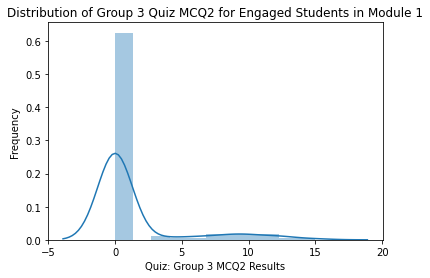

In [27]:
# Visualize the distribution of 'Quiz: Group 3 MCQ (Real)'
sns.distplot(m1mg['Quiz: Group 3 - MCQ2 (Real)'])
plt.title('Distribution of Group 3 Quiz MCQ2 for Engaged Students in Module 1')
plt.xlabel('Quiz: Group 3 MCQ2 Results')
plt.ylabel('Frequency ')

Text(0, 0.5, 'Frequency ')

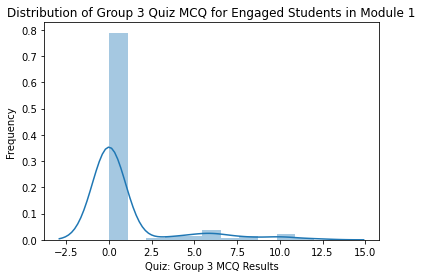

In [28]:
# Visualize the distribution of 'Quiz: Group 3 MCQ (Real)'
sns.distplot(m1mg['Quiz: Group 3 MCQ (Real)'])
plt.title('Distribution of Group 3 Quiz MCQ for Engaged Students in Module 1')
plt.xlabel('Quiz: Group 3 MCQ Results')
plt.ylabel('Frequency ')

Text(0, 0.5, 'Frequency ')

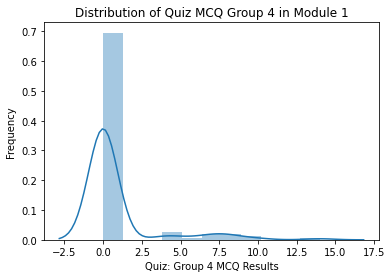

In [31]:
# Visualize the distribution of 'Quiz: Group 4 MCQ (Real)'
sns.distplot(m1mg['Quiz: Group 4 MCQ (Real)'])
plt.title('Distribution of Quiz MCQ Group 4 in Module 1')
plt.xlabel('Quiz: Group 4 MCQ Results')
plt.ylabel('Frequency ')

In [32]:
m1mg.columns

Index(['First name', 'Surname', 'ID number', 'Course total (Real)',
       'Quiz: Group 1 MCQ (Real)', 'Quiz: Group 1 - MCQ2 (Real)',
       'Quiz: Group 2 MCQ (Real)', 'Quiz: Group 2 - MCQ2 (Real)',
       'Quiz: Group 3 MCQ (Real)', 'Quiz: Group 3 - MCQ2 (Real)',
       'Quiz: Group 4 MCQ (Real)', 'Quiz: Group 5 MCQ (Real)',
       'Quiz: Group 5 - MCQ2 (Real)', 'Quiz: Group 6 MCQ (Real)',
       'Quiz: Group 6 - MCQ2 (Real)', 'Quiz: Group 7 MCQ (Real)',
       'Quiz: Group 7 - MCQ2 (Real)', 'Quiz: Late MCQ1 (Real)', 'engaged'],
      dtype='object')

In [33]:
#m1mg.Quiz: Group 4 MCQ (Real)

In [34]:
spear1 = m1mg['Quiz: Group 4 MCQ (Real)']

In [35]:
spear2 = m1mg['engaged']

In [36]:
spearcorr = stats.spearmanr(spear1,spear2)
print(spearcorr)
# Would suggest a weak link 

SpearmanrResult(correlation=0.025528413672037474, pvalue=0.7801578882297835)


In [37]:
spear3 = m1mg['Quiz: Group 3 MCQ (Real)']

In [38]:
spear33 = m1mg['Quiz: Group 3 - MCQ2 (Real)']

In [39]:
spearcorr = stats.spearmanr(spear33,spear2)
print(spearcorr)

SpearmanrResult(correlation=0.2743588335213697, pvalue=0.002227440570670997)


In [40]:
pearcorr = stats.pearsonr(spear3, spear2)
print(pearcorr)


(0.30669121271315025, 0.000590745012507143)


In [41]:
m1mg.describe()

Course total (Real)  Quiz: Group 1 MCQ (Real)  \
count           122.000000                122.000000   
mean             43.060246                  0.786885   
std              19.182017                  2.156020   
min               0.000000                  0.000000   
25%              33.330000                  0.000000   
50%              43.330000                  0.000000   
75%              53.330000                  0.000000   
max              93.330000                  9.000000   

       Quiz: Group 1 - MCQ2 (Real)  Quiz: Group 2 MCQ (Real)  \
count                   122.000000                122.000000   
mean                      0.909836                  0.844262   
std                       2.555189                  2.425827   
min                       0.000000                  0.000000   
25%                       0.000000                  0.000000   
50%                       0.000000                  0.000000   
75%                       0.000000                  0.000000   
max                      13.000000                 12.000000   

       Quiz: Group 2 - MCQ2 (Real)  Quiz: Group 3 MCQ (Real)  \
count                   122.000000                122.000000   
mean                      0.631148                  0.950820   
std                       1.963303                  2.541726   
min                       0.000000                  0.000000   
25%                       0.000000                  0.000000   
50%                       0.000000                  0.000000   
75%                       0.000000                  0.000000   
max                      11.000000                 12.000000   

       Quiz: Group 3 - MCQ2 (Real)  Quiz: Group 4 MCQ (Real)  \
count                   122.000000                122.000000   
mean                      1.319672                  0.827869   
std                       3.407009                  2.475308   
min                       0.000000                  0.000000   
25%                       0.000000                  0.000000   
50%                       0.000000                  0.000000   
75%                       0.000000                  0.000000   
max                      15.000000                 14.000000   

       Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
count                122.000000                   122.000000   
mean                   0.942623                     0.819672   
std                    2.613693                     2.256364   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.000000   
75%                    0.000000                     0.000000   
max                   12.000000                    11.000000   

       Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
count                122.000000                   122.000000   
mean                   0.811475                     1.073770   
std                    2.224328                     2.960255   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.000000   
75%                    0.000000                     0.000000   
max                   10.000000                    13.000000   

       Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
count                122.000000                   122.000000   
mean                   0.827869                     0.770492   
std                    2.478645                     2.452143   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.000000   
75%                    0.000000                     0.000000   
max                   13.000000                    13.000000   

       Quiz: Late MCQ1 (Real)     engage

In [42]:
print(m1mg['Course total (Real)'].value_counts(dropna=False))
# What are the value counts of the different marks


46.67    12
53.33    11
40.00    11
0.00     10
50.00    10
43.33    10
36.67    10
26.67     9
33.33     6
56.67     6
30.00     6
60.00     5
73.33     5
80.00     2
66.67     2
20.00     2
83.33     2
70.00     1
93.33     1
76.67     1
Name: Course total (Real), dtype: int64


In [43]:
# Describe the column
print(m1mg['Course total (Real)'].describe())


count    122.000000
mean      43.060246
std       19.182017
min        0.000000
25%       33.330000
50%       43.330000
75%       53.330000
max       93.330000
Name: Course total (Real), dtype: float64


Text(0, 0.5, 'Grade ')

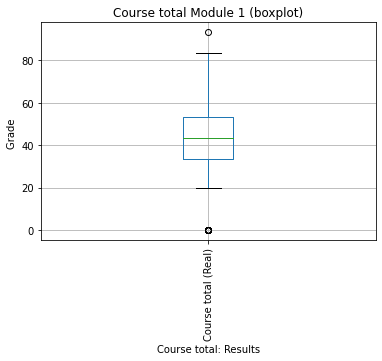

In [44]:
# Create the boxplot
m1mg.boxplot(column='Course total (Real)', rot=90)
plt.title('Course total Module 1 (boxplot)')
plt.xlabel('Course total: Results')
plt.ylabel('Grade ')


In [45]:
m1mg.head(2)

First name Surname ID number  Course total (Real)  Quiz: Group 1 MCQ (Real)  \
0       a8NM    bDqB  U8NMDqBG                46.67                         0   
1       aSnR    bGk9  VSnRGk9O                36.67                         5   

   Quiz: Group 1 - MCQ2 (Real)  Quiz: Group 2 MCQ (Real)  \
0                            0                         0   
1                            6                         0   

   Quiz: Group 2 - MCQ2 (Real)  Quiz: Group 3 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 3 - MCQ2 (Real)  Quiz: Group 4 MCQ (Real)  \
0                            0                         7   
1                            0                         0   

   Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Late MCQ1 (Real)  engaged  
0                       0        0  
1                       0        0

Text(0, 0.5, 'Quiz: Group 4 MCQ ')

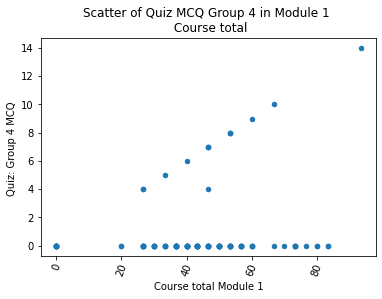

In [46]:
m1mg.plot(kind='scatter', x='Course total (Real)', y='Quiz: Group 4 MCQ (Real)', rot=70)
# For scatter plot value must be numberic
# Add title and labels
plt.title('Scatter of Quiz MCQ Group 4 in Module 1 \n Course total')
plt.xlabel('Course total Module 1')
plt.ylabel('Quiz: Group 4 MCQ ')



In [47]:
#pearcorr = stats.pearsonr(m1mg.'Course total (Real)',m1mg.'Quiz: Group 4 MCQ (Real)')

In [48]:
module1ml.head(2)

Time User full name Affected user     Event context Component  \
0  20/02/19, 01:56      ansW buTW             -  File: Lecture 10      File   
1  20/02/19, 01:56      ansW buTW             -  Course: Module 1    System   

             Event name                                        Description  \
0  Course module viewed  The user with id '0' viewed the 'resource' act...   
1         Course viewed  The user with id '0' viewed the course with id...   

  Origin IP address  
0    web  127.0.0.1  
1    web  127.0.0.1

In [49]:
# Date
#
#
#time1
time1 = module1ml["Time"].str.split(",", n = 1, expand = True)

In [50]:
# making separate Date column from new data frame 
module1ml["Date"]= time1[0] 

# making seperate Time column from new data frame
module1ml['Time']= time1[1]

In [51]:
# Convert the date column to datetime64
module1ml.Date = pd.to_datetime(module1ml.Date)

In [52]:
module1ml.dtypes

Time                      object
User full name            object
Affected user             object
Event context             object
Component                 object
Event name                object
Description               object
Origin                    object
IP address                object
Date              datetime64[ns]
dtype: object

In [53]:
# Name split
# new data frame with split value columns 
new1 = module1ml["User full name"].str.split(" ", n = 1, expand = True)


In [54]:
# making separate first name column from new data frame 
module1ml["First name"]= new1[0] 

In [55]:
# making separate last name column from new data frame 
module1ml["Last name"]= new1[1] 

In [56]:
module1ml.dtypes

Time                      object
User full name            object
Affected user             object
Event context             object
Component                 object
Event name                object
Description               object
Origin                    object
IP address                object
Date              datetime64[ns]
First name                object
Last name                 object
dtype: object

In [57]:
module1ml = module1ml.drop(module1ml[['IP address','Origin','Description','Affected user']], axis=1)


In [58]:
module1ml.head(2)

Time User full name     Event context Component            Event name  \
0   01:56      ansW buTW  File: Lecture 10      File  Course module viewed   
1   01:56      ansW buTW  Course: Module 1    System         Course viewed   

        Date First name Last name  
0 2019-02-20       ansW      buTW  
1 2019-02-20       ansW      buTW

In [59]:
#Remove activity outside semester start and end dates range -Timeedit1
mask1 = (module1ml['Date'] >= StartDate) & (module1ml['Date'] <= EndDate)

module1ml = module1ml.loc[mask1]

len(module1ml)

11451

In [60]:
mask1.head(2)

0    False
1    False
Name: Date, dtype: bool

In [61]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_1 = (module1ml['Date'] >= StartDate) & (module1ml['Date'] <= TriOne)

FirstFive1 = module1ml.loc[week5_1]

len(FirstFive1)

3831

In [62]:
# Generates descriptive statistics
week5_1.describe().transpose()

count     11451
unique        2
top       False
freq       7620
Name: Date, dtype: object

In [63]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_1 = (module1ml['Date'] >= TriOne) & (module1ml['Date'] <= TriTwo)

FirstTen1 = module1ml.loc[week10_1]

len(FirstTen1)

3982

In [64]:
#Remove activity outside semester start and end dates range -Timeedit1
week15_1 = (module1ml['Date'] >= TriTwo) & (module1ml['Date'] <= EndDate)

FirstFivt1 = module1ml.loc[week15_1]

len(FirstFivt1)

4410

In [63]:
#drop1ml

In [65]:
module1ml.head(2)

Time User full name     Event context    Component  \
136   21:48      a7t7 bfTq  Course: Module 1  User report   
137   21:48      a7t7 bfTq  Course: Module 1       System   

                   Event name       Date First name Last name  
136  Grade user report viewed 2019-01-02       a7t7      bfTq  
137             Course viewed 2019-01-02       a7t7      bfTq

In [66]:
week5_1.head(2)

136    False
137    False
Name: Date, dtype: bool

In [67]:
# Print the number of unique values in each modul1lg column
print(m1mg.nunique())

First name                     122
Surname                        122
ID number                      122
Course total (Real)             20
Quiz: Group 1 MCQ (Real)         8
Quiz: Group 1 - MCQ2 (Real)      8
Quiz: Group 2 MCQ (Real)         8
Quiz: Group 2 - MCQ2 (Real)      8
Quiz: Group 3 MCQ (Real)         9
Quiz: Group 3 - MCQ2 (Real)     12
Quiz: Group 4 MCQ (Real)         9
Quiz: Group 5 MCQ (Real)         8
Quiz: Group 5 - MCQ2 (Real)      8
Quiz: Group 6 MCQ (Real)         9
Quiz: Group 6 - MCQ2 (Real)      9
Quiz: Group 7 MCQ (Real)         9
Quiz: Group 7 - MCQ2 (Real)     10
Quiz: Late MCQ1 (Real)           3
engaged                          2
dtype: int64


In [68]:
print(FirstFivt1.nunique())

Time              876
User full name    108
Event context      40
Component           9
Event name         23
Date               38
First name        108
Last name         108
dtype: int64


In [69]:
#FirstFivt1.groupby(['Event name']).std()


In [70]:
FirstFivt1['Event name'].unique

<bound method Series.unique of 136      Grade user report viewed
137                 Course viewed
286          Course module viewed
287                 Course viewed
288                 Course viewed
                   ...           
14473               Course viewed
14474               Course viewed
14475        Course module viewed
14476        Course module viewed
14477               Course viewed
Name: Event name, Length: 4410, dtype: object>

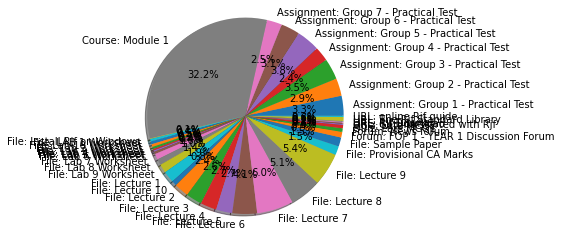

In [71]:
labels = FirstFivt1['Event context'].astype('category').cat.categories.tolist()
counts = FirstFivt1['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

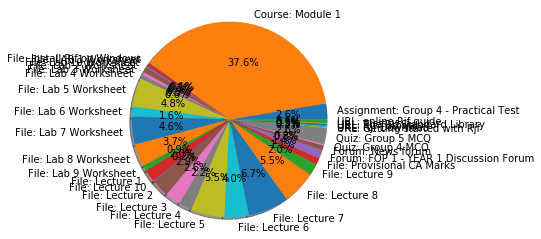

In [73]:
labels = FirstTen1['Event context'].astype('category').cat.categories.tolist()
counts = FirstTen1['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [72]:
FirstFivt1["Component"].value_counts()


File                1884
System              1241
Assignment           747
File submissions     200
User report          168
Forum                 68
URL                   57
Quiz                  33
Overview report       12
Name: Component, dtype: int64

In [73]:
module1ml["Component"].value_counts()

File                4988
System              4174
Assignment           747
Quiz                 512
User report          289
URL                  282
Forum                231
File submissions     200
Overview report       28
Name: Component, dtype: int64

In [74]:
FirstFivt1["Event context"].value_counts()
# The files from in Lecture 1 go from Lecture 2 to Lecture 9
# All the quizess will get higher weigthing

Course: Module 1                          1422
File: Lecture 7                            266
File: Lecture 9                            239
File: Lecture 8                            226
File: Lecture 6                            179
Assignment: Group 5 - Practical Test       169
Assignment: Group 3 - Practical Test       153
Assignment: Group 1 - Practical Test       145
Assignment: Group 6 - Practical Test       137
Assignment: Group 2 - Practical Test       128
File: Lecture 5                            118
File: Lecture 4                            117
File: Lecture 3                            116
Assignment: Group 7 - Practical Test       110
File: Lecture 2                            106
Assignment: Group 4 - Practical Test       105
File: Lecture 1                             84
File: Sample Paper                          65
File: Provisional CA Marks                  65
File: Lab 9 Worksheet                       63
File: Lab 8 Worksheet                       44
File: Lab 7 W

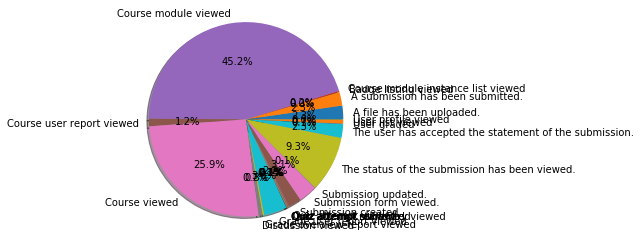

In [77]:
labels = FirstFivt1['Event name'].astype('category').cat.categories.tolist()
counts = FirstFivt1['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

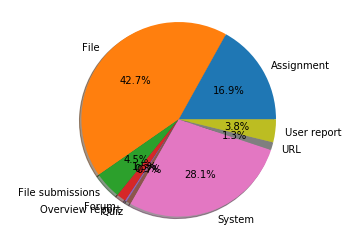

In [78]:
labels = FirstFivt1['Component'].astype('category').cat.categories.tolist()
counts = FirstFivt1['Component'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [75]:
module1ml["Event context"].value_counts()
# The files from in Lecture 1 go from Lecture 2 to Lecture 9
# All the quizess will get higher weigthing

Course: Module 1                          4498
File: Lecture 7                            499
File: Lecture 8                            420
File: Lecture 4                            385
File: Lecture 3                            345
File: Lecture 5                            335
File: Lecture 2                            321
File: Lecture 6                            317
File: Lecture 1                            303
File: Lecture 9                            264
File: LAB 1 Worksheet                      254
File: Lab 4 Worksheet                      237
File: Lab 7 Worksheet                      214
File: Lab 5 Worksheet                      200
File: Lab 8 Worksheet                      185
File: Provisional CA Marks                 183
Assignment: Group 5 - Practical Test       169
Assignment: Group 3 - Practical Test       153
Assignment: Group 1 - Practical Test       145
Quiz: Group 3 MCQ                          138
Assignment: Group 6 - Practical Test       137
Assignment: G

In [76]:
# module1lg
#
#

In [76]:
module1lg.info()
# Lecturer Grade info
# 95

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 95 non-null     int64  
 1   Student Id         95 non-null     object 
 2   Name               95 non-null     object 
 3   % CA               95 non-null     int64  
 4   % exam             95 non-null     int64  
 5   Average            95 non-null     float64
 6   Final(Rounded Up)  95 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ KB


In [77]:
module1lg.Average.value_counts()

35.0    6
35.5    6
40.5    4
0.0     4
50.0    3
       ..
61.5    1
74.0    1
50.5    1
22.0    1
41.5    1
Name: Average, Length: 65, dtype: int64

In [78]:
module1lg.Average.plot('hist')
# Average
plt.title('Histogram of Average grades in Module 1 \n Module 1')
plt.xlabel('Average total Module 1')
plt.ylabel('Frequency ')


TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.

In [79]:
average_mean = np.mean(module1lg)
# Compute the mean


In [80]:
print(average_mean)
# Print the results with some nice formatting


id                   61.684211
% CA                 43.726316
% exam               46.747368
Average              45.236842
Final(Rounded Up)    45.421053
dtype: float64


In [81]:
module1lg.describe().transpose()
# Moodle 1 lecture grades
# 95 Moodle grades

count       mean        std  min   25%   50%    75%    max
id                  95.0  61.684211  36.011010  2.0  29.5  64.0  92.50  122.0
% CA                95.0  43.726316  20.434348  0.0  32.5  42.0  56.00   90.0
% exam              95.0  46.747368  22.961563  0.0  35.0  44.0  62.00   90.0
Average             95.0  45.236842  20.576898  0.0  35.0  44.0  56.75   89.5
Final(Rounded Up)   95.0  45.421053  20.606020  0.0  35.0  44.0  57.00   90.0

In [82]:
# Exploring 1 column final
final1 = module1lg['Final(Rounded Up)']

In [83]:
final1.value_counts().sort_index()

0     4
3     1
7     1
8     1
10    1
17    1
22    1
24    1
26    1
27    2
29    1
30    2
31    2
32    1
35    6
36    7
37    2
40    2
41    6
42    1
43    3
44    1
45    3
46    1
47    2
48    2
50    3
51    3
52    1
53    2
54    1
55    2
56    1
57    3
58    1
60    2
61    1
62    2
64    1
65    1
67    1
68    2
71    1
74    2
76    2
81    1
82    2
84    1
88    2
90    1
Name: Final(Rounded Up), dtype: int64

Text(0, 0.5, 'Frequency ')

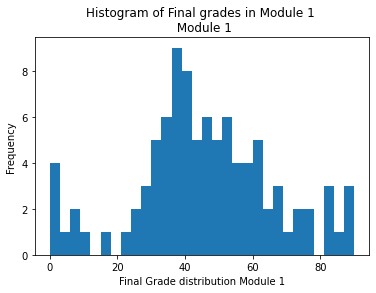

In [84]:
plt.hist(final1.dropna(),bins=30)
plt.title('Histogram of Final grades in Module 1 \n Module 1')
plt.xlabel('Final Grade distribution Module 1')
plt.ylabel('Frequency ')

In [85]:
module1lg['Final(Rounded Up)'].plot('hist')
plt.title('Histogram of Final grades in Module 1 \n Module 1')
plt.xlabel('Final Grade distribution Module 1')
plt.ylabel('Frequency ')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.

In [88]:
fail1 = module1lg['Final(Rounded Up)'] < 40

In [89]:
fail1.sum()

35

In [90]:
disengaged1 = module1lg['Final(Rounded Up)'] < 55

In [91]:
disengaged1.sum()

66

In [92]:
# Filter the election DataFrame with the high_turnout array: high_turnout_df
disengaged1_df = module1lg.loc[disengaged1]

In [93]:
average_mean = np.mean(disengaged1_df)
# Compute the mean


In [90]:
print(average_mean)

id                   61.684211
% CA                 43.726316
% exam               46.747368
Average              45.236842
Final(Rounded Up)    45.421053
dtype: float64


In [91]:
disengaged1_df
# the list of users who failed

NameError: name 'disengaged1_df' is not defined

In [92]:
engaged1 = module1lg['Final(Rounded Up)'] > 55

In [93]:
engaged1.sum()
# 27 out of 120 students are classed as engaged

27

In [94]:
# Using 'passed1' as the column name 
# and equating it to the list 
module1lg['Engaged Students Module 1'] = engaged1 

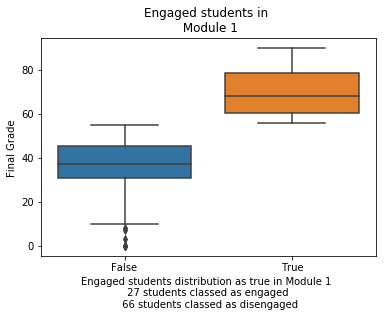

In [99]:
sns.boxplot(x = 'Engaged Students Module 1', y = 'Final(Rounded Up)', data = module1lg)
plt.title('Engaged students in \n Module 1')
plt.xlabel('Engaged students distribution as true in Module 1 \n 27 students classed as engaged \n 66 students classed as disengaged')
plt.ylabel('Final Grade ')

In [86]:
# Group Module Lecture Grades  by 'Churn' and compute the mean
print(module1lg.groupby(['Engaged Students Module 1']).mean())


KeyError: 'Engaged Students Module 1'

In [101]:
print(module1lg.groupby(['Engaged Students Module 1']).std())

                                  id       % CA     % exam    Average  \
Engaged Students Module 1                                               
False                      34.677806  14.859039  17.545194  14.495608   
True                       39.681783  12.543713  12.444750  10.992357   

                           Final(Rounded Up)  
Engaged Students Module 1                     
False                              14.543047  
True                               10.904925  


In [95]:
engaged1.mean()
# Average passed score was 6

0.28421052631578947

In [ ]:
# 
#


In [87]:
m1mg_subset = module1mg.drop(module1mg[['Quiz: Late MCQ2 (Real)','Quiz: Group 4 - MCQ2 (Real)','Assignment: Late Practical (Real)','Email address','Last downloaded from this course','Assignment: Group 1 - Practical Test (Real)','Assignment: Group 2 - Practical Test (Real)','Assignment: Group 3 - Practical Test (Real)','Assignment: Group 4 - Practical Test (Real)','Assignment: Group 5 - Practical Test (Real)','Assignment: Group 6 - Practical Test (Real)','Assignment: Group 7 - Practical Test (Real)']], axis=1)

In [88]:
m1mg_subset.head(2)

First name Surname ID number  Course total (Real)  Quiz: Group 1 MCQ (Real)  \
0       a8NM    bDqB  U8NMDqBG                46.67                         0   
1       aSnR    bGk9  VSnRGk9O                36.67                         5   

   Quiz: Group 1 - MCQ2 (Real)  Quiz: Group 2 MCQ (Real)  \
0                            0                         0   
1                            6                         0   

   Quiz: Group 2 - MCQ2 (Real)  Quiz: Group 3 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 3 - MCQ2 (Real)  Quiz: Group 4 MCQ (Real)  \
0                            0                         7   
1                            0                         0   

   Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Late MCQ1 (Real)  engaged  
0                       0        0  
1                       0        0

In [89]:
m1mg_subset

First name Surname ID number  Course total (Real)  \
0         a8NM    bDqB  U8NMDqBG                46.67   
1         aSnR    bGk9  VSnRGk9O                36.67   
2         aAK5    bSAb  tAK5SAbE                53.33   
3         a4jV    bO8M  14jVO8M7                 0.00   
4         aa14    bMdv  ba14Mdv9                46.67   
..         ...     ...       ...                  ...   
117       ak8R    bBNX  9k8RBNXk                73.33   
118       a1de    bNfO  c1deNfOy                53.33   
119       afY5    bOiK  bfY5OiKA                70.00   
120       aXIv    b1jf  5XIv1jfi                43.33   
121       aiG1    bhcI  GiG1hcIK                60.00   

     Quiz: Group 1 MCQ (Real)  Quiz: Group 1 - MCQ2 (Real)  \
0                           0                            0   
1                           5                            6   
2                           0                            0   
3                           0                            0   
4                           0                            7   
..                        ...                          ...   
117                         0                            0   
118                         0                            0   
119                         0                            0   
120                         0                            0   
121                         0                            0   

     Quiz: Group 2 MCQ (Real)  Quiz: Group 2 - MCQ2 (Real)  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
..                        ...                          ...   
117                         0                            0   
118                         0                            0   
119                         0                            0   
120                         8                            5   
121                         0                            0   

     Quiz: Group 3 MCQ (Real)  Quiz: Group 3 - MCQ2 (Real)  \
0                           0                            0   
1                           0                            0   
2                           6                           10   
3                           0                            0   
4                           0                            0   
..                        ...                          ...   
117                         0                            0   
118                         0                            0   
119                         0                            0   
120                         0                            0   
121                         0                            9   

     Quiz: Group 4 MCQ (Real)  Quiz: Group 5 MCQ (Real)  \
0                           7                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   
..                        ...                       ...   
117                         0                         0   
118                         0                         0   
119                         0                         0   
120                         0                         0   
121                         0                         0   

     Quiz: Group 5 - MCQ2 (Real)  Quiz: Group 6 MCQ (Real)  \
0                              0                         0   
1                              0                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   
.. 

In [90]:
m1mg_subset.dtypes

First name                      object
Surname                         object
ID number                       object
Course total (Real)            float64
Quiz: Group 1 MCQ (Real)         int64
Quiz: Group 1 - MCQ2 (Real)      int64
Quiz: Group 2 MCQ (Real)         int64
Quiz: Group 2 - MCQ2 (Real)      int64
Quiz: Group 3 MCQ (Real)         int64
Quiz: Group 3 - MCQ2 (Real)      int64
Quiz: Group 4 MCQ (Real)         int64
Quiz: Group 5 MCQ (Real)         int64
Quiz: Group 5 - MCQ2 (Real)      int64
Quiz: Group 6 MCQ (Real)         int64
Quiz: Group 6 - MCQ2 (Real)      int64
Quiz: Group 7 MCQ (Real)         int64
Quiz: Group 7 - MCQ2 (Real)      int64
Quiz: Late MCQ1 (Real)           int64
engaged                          int64
dtype: object

In [91]:
m1mg_subset.head(2)

First name Surname ID number  Course total (Real)  Quiz: Group 1 MCQ (Real)  \
0       a8NM    bDqB  U8NMDqBG                46.67                         0   
1       aSnR    bGk9  VSnRGk9O                36.67                         5   

   Quiz: Group 1 - MCQ2 (Real)  Quiz: Group 2 MCQ (Real)  \
0                            0                         0   
1                            6                         0   

   Quiz: Group 2 - MCQ2 (Real)  Quiz: Group 3 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 3 - MCQ2 (Real)  Quiz: Group 4 MCQ (Real)  \
0                            0                         7   
1                            0                         0   

   Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Late MCQ1 (Real)  engaged  
0                       0        0  
1                       0        0

In [92]:
Xm1mg = m1mg_subset.iloc[:,4:18]  #independent columns
ym1mg = m1mg_subset.iloc[:,-1]    #target column i.e engaged

In [93]:
Xm1mg.head(2)

Quiz: Group 1 MCQ (Real)  Quiz: Group 1 - MCQ2 (Real)  \
0                         0                            0   
1                         5                            6   

   Quiz: Group 2 MCQ (Real)  Quiz: Group 2 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 3 MCQ (Real)  Quiz: Group 3 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   

   Quiz: Group 4 MCQ (Real)  Quiz: Group 5 MCQ (Real)  \
0                         7                         0   
1                         0                         0   

   Quiz: Group 5 - MCQ2 (Real)  Quiz: Group 6 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 6 - MCQ2 (Real)  Quiz: Group 7 MCQ (Real)  \
0                            0                         0   
1                            0                         0   

   Quiz: Group 7 - MCQ2 (Real)  Quiz: Late MCQ1 (Real)  
0                            0                       0  
1                            0                       0

In [94]:
ym1mg.head(2)

0    0
1    0
Name: engaged, dtype: int64

In [95]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xm1mg,ym1mg)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xm1mg.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

                          Specs       Score
5   Quiz: Group 3 - MCQ2 (Real)  123.895819
4      Quiz: Group 3 MCQ (Real)   77.329883
12  Quiz: Group 7 - MCQ2 (Real)   16.171968
9      Quiz: Group 6 MCQ (Real)   15.307254
10  Quiz: Group 6 - MCQ2 (Real)   10.761945
6      Quiz: Group 4 MCQ (Real)    9.198738
11     Quiz: Group 7 MCQ (Real)    7.764177
13       Quiz: Late MCQ1 (Real)    6.185567
8   Quiz: Group 5 - MCQ2 (Real)    5.548866
0      Quiz: Group 1 MCQ (Real)    0.862131


[0.01813267 0.07062081 0.07336082 0.01240719 0.16001523 0.13558439
 0.12446685 0.02122056 0.09283292 0.11072298 0.05034692 0.04737065
 0.07063122 0.01228679]


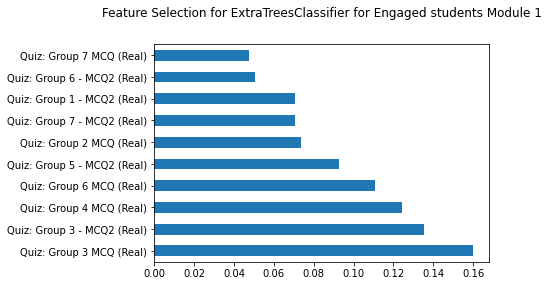

In [96]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xm1mg,ym1mg)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xm1mg.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Selection for ExtraTreesClassifier for Engaged students Module 1', y=1.1)
plt.show()

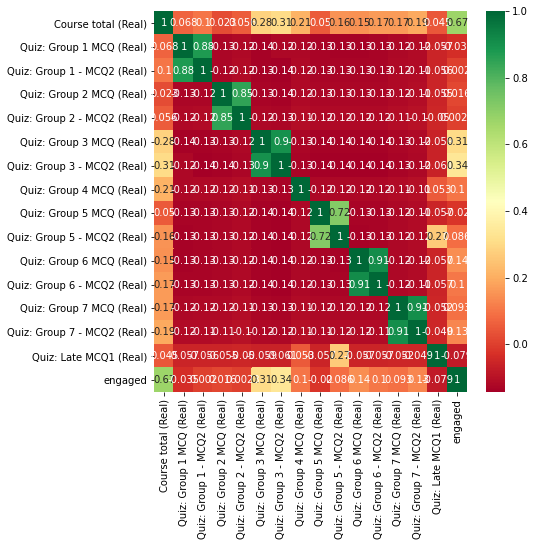

In [97]:
#get correlations of each features in dataset
corrmat = m1mg_subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(7,7))
#plot heat map
g=sns.heatmap(m1mg_subset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [108]:
# Print the number of unique values in each modul1lg column
print(m1mg.nunique())
# Remove the columns with 
# Important to remove unesscary values

First name                     122
Surname                        122
ID number                      122
Course total (Real)             20
Quiz: Group 1 MCQ (Real)         8
Quiz: Group 1 - MCQ2 (Real)      8
Quiz: Group 2 MCQ (Real)         8
Quiz: Group 2 - MCQ2 (Real)      8
Quiz: Group 3 MCQ (Real)         9
Quiz: Group 3 - MCQ2 (Real)     12
Quiz: Group 4 MCQ (Real)         9
Quiz: Group 5 MCQ (Real)         8
Quiz: Group 5 - MCQ2 (Real)      8
Quiz: Group 6 MCQ (Real)         9
Quiz: Group 6 - MCQ2 (Real)      9
Quiz: Group 7 MCQ (Real)         9
Quiz: Group 7 - MCQ2 (Real)     10
Quiz: Late MCQ1 (Real)           3
engaged                          2
dtype: int64


In [98]:
module1ml_sklearn = module1ml.copy()
# module1ml_sklearn = module1ml.copy()
# label encoding using scikit-learn's LabelEncoder
lb_make = LabelEncoder()
module1ml_sklearn['Event name'] = lb_make.fit_transform(module1ml['Event name'])
module1ml_sklearn.head() #Results in appending a new column to df

# Label encoding is pretty much intuitive and straight-forward and may give you a good performance from your learning algorithm, 
# but it has as disadvantage that the numerical values can be misinterpreted by the algorithm.
#


Time User full name     Event context    Component  Event name  \
136   21:48      a7t7 bfTq  Course: Module 1  User report          11   
137   21:48      a7t7 bfTq  Course: Module 1       System           7   
286   21:52      aRY9 bwYJ   File: Lecture 1         File           4   
287   21:52      aRY9 bwYJ  Course: Module 1       System           7   
288   20:29      ansW buTW  Course: Module 1       System           7   

          Date First name Last name  
136 2019-01-02       a7t7      bfTq  
137 2019-01-02       a7t7      bfTq  
286 2019-01-21       aRY9      bwYJ  
287 2019-01-21       aRY9      bwYJ  
288 2019-01-21       ansW      buTW

In [99]:
module1ml_onehot = module1ml.copy()
module1ml_onehot = pd.get_dummies(module1ml_onehot, columns=['Event name'], prefix = ['Event name'])
module1ml_onehot = pd.get_dummies(module1ml_onehot, columns=['Event context'], prefix = ['Event context'])
module1ml_onehot = pd.get_dummies(module1ml_onehot, columns=['Component'], prefix = ['Component'])


print(module1ml_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data



       Time User full name       Date First name Last name  \
136   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
137   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
286   21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
287   21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
288   20:29      ansW buTW 2019-01-21       ansW      buTW   

     Event name_A file has been uploaded.  \
136                                     0   
137                                     0   
286                                     0   
287                                     0   
288                                     0   

     Event name_A submission has been submitted.  \
136                                            0   
137                                            0   
286                                            0   
287                                            0   
288                                            0   

     Event name_Badge listing viewed  \
136

In [100]:
module1ml_onehot.dtypes


Time                                 object
User full name                       object
Date                         datetime64[ns]
First name                           object
Last name                            object
                                  ...      
Component_Overview report             uint8
Component_Quiz                        uint8
Component_System                      uint8
Component_URL                         uint8
Component_User report                 uint8
Length: 88, dtype: object

In [ ]:
# Merge1
#
#
#
#

In [101]:
# Onehot1 merge
merge_subset1 = pd.merge(module1ml_onehot,m1mg_subset[['First name','engaged']],on='First name', how='left')


In [102]:
merge_subset1

Time User full name       Date First name Last name  \
0       21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
1       21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
2       21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
3       21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
4       20:29      ansW buTW 2019-01-21       ansW      buTW   
...       ...            ...        ...        ...       ...   
11446   14:23      an00 bEQ2 2018-09-19       an00      bEQ2   
11447   14:23      an00 bEQ2 2018-09-19       an00      bEQ2   
11448   14:23      an00 bEQ2 2018-09-19       an00      bEQ2   
11449   14:23      aglU bwda 2018-09-19       aglU      bwda   
11450   14:23      aglU bwda 2018-09-19       aglU      bwda   

       Event name_A file has been uploaded.  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
11446                                     0   
11447                                     0   
11448                                     0   
11449                                     0   
11450                                     0   

       Event name_A submission has been submitted.  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
11446                                            0   
11447                                            0   
11448                                            0   
11449                                            0   
11450                                            0   

       Event name_Badge listing viewed  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   
...                                ...   
11446                                0   
11447                                0   
11448                                0   
11449                                0   
11450                                0   

       Event name_Course module instance list viewed  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
11446                                              0   
11447                                              0   
11448                                              0   
11449                                              0   
11450                                              0   

       Event name_Course module viewed  ...  Component_Assignment  \
0                                    0  ...                     0   
1                                    0  ...                     0   
2                                    1  ...                     0   
3                                    0  ...                     0   
4                                    0  ...                     0   
...                                ...  ...                   ...   
11446                                0  ...                     0   
11447                                0  ...                     0   
11448                                0  ...                     0   
11449                                0  ...                     0   
11450                                0  ...                     0   

       Component_Fi

In [103]:
merge_subset1.head(2)

Time User full name       Date First name Last name  \
0   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
1   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  ...  Component_Assignment  Component_File  \
0                                0  ...                     0               0   
1                                0  ...                     0               0   

   Component_File submissions  Component_Forum  Component_Overview report  \
0                           0                0                          0   
1                           0                0                          0   

   Component_Quiz  Component_System  Component_URL  Component_User report  \
0               0                 0              0                      1   
1               0                 1              0                      0   

   engaged  
0        0  
1        0  

[2 rows x 89 columns]

In [104]:
merge_subset1.head(2)

Time User full name       Date First name Last name  \
0   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
1   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  ...  Component_Assignment  Component_File  \
0                                0  ...                     0               0   
1                                0  ...                     0               0   

   Component_File submissions  Component_Forum  Component_Overview report  \
0                           0                0                          0   
1                           0                0                          0   

   Component_Quiz  Component_System  Component_URL  Component_User report  \
0               0                 0              0                      1   
1               0                 1              0                      0   

   engaged  
0        0  
1        0  

[2 rows x 89 columns]

In [105]:
X1s = merge_subset1.iloc[:,5:88]  #independent columns
y1s = merge_subset1.iloc[:,-1]    #target column i.e engaged


In [106]:
X1s.head(2)

Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  Event name_Course searched  \
0                                0                           0   
1                                0                           0   

   Event name_Course user report viewed  Event name_Course viewed  \
0                                     0                         0   
1                                     0                         1   

   Event name_Discussion created  Event name_Discussion viewed  ...  \
0                              0                             0  ...   
1                              0                             0  ...   

   Event context_URL: online Rjf guide  Component_Assignment  Component_File  \
0                                    0                     0               0   
1                                    0                     0               0   

   Component_File submissions  Component_Forum  Component_Overview report  \
0                           0                0                          0   
1                           0                0                          0   

   Component_Quiz  Component_System  Component_URL  Component_User report  
0               0                 0              0                      1  
1               0                 1              0                      0  

[2 rows x 83 columns]

In [107]:
X1s.dtypes

Event name_A file has been uploaded.             uint8
Event name_A submission has been submitted.      uint8
Event name_Badge listing viewed                  uint8
Event name_Course module instance list viewed    uint8
Event name_Course module viewed                  uint8
                                                 ...  
Component_Overview report                        uint8
Component_Quiz                                   uint8
Component_System                                 uint8
Component_URL                                    uint8
Component_User report                            uint8
Length: 83, dtype: object

In [108]:
y1s.head(2)

0    0
1    0
Name: engaged, dtype: int64

In [109]:
y1s.dtypes

dtype('int64')

In [110]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X1s,y1s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                                Specs      Score
31  Event context_Assignment: Group 3 - Practical ...  65.788602
63                    Event context_Quiz: Group 3 MCQ  36.772765
39               Event context_File: Lab 10 Worksheet  22.103855
46                Event context_File: Lab 8 Worksheet  15.977438
54                      Event context_File: Lecture 6   8.051252
58           Event context_File: Provisional CA Marks   7.979629
6                Event name_Course user report viewed   7.091281
75                                     Component_File   7.091171
29  Event context_Assignment: Group 1 - Practical ...   6.446768
67                      Event context_Quiz: Late MCQ1   6.380721


[0.0008556  0.00186796 0.00029056 0.00083942 0.01197375 0.00122163
 0.02393165 0.00776454 0.00054324 0.00178499 0.00026584 0.00241845
 0.00047698 0.00248075 0.00103648 0.00099363 0.00377716 0.00423691
 0.00034125 0.00110676 0.00099693 0.01064387 0.00177775 0.00746092
 0.00193407 0.00039829 0.00045338 0.00038852 0.00254943 0.02468403
 0.00944934 0.20617139 0.01431933 0.01730606 0.00848496 0.01399045
 0.00536599 0.00026788 0.00130277 0.08589575 0.00680682 0.00054538
 0.00080471 0.00066901 0.01923965 0.01720628 0.0680149  0.00059297
 0.00119045 0.01642323 0.01139626 0.00078343 0.00627632 0.01203096
 0.01734081 0.00245127 0.00484055 0.00176107 0.03856988 0.00617742
 0.00178615 0.0009073  0.01770815 0.11424335 0.00473725 0.01583201
 0.01382784 0.02059999 0.00700818 0.0012587  0.00133852 0.01274394
 0.00369486 0.00043602 0.00924573 0.02180265 0.00199443 0.00235599
 0.00025576 0.0124735  0.00610941 0.01267775 0.00179246]


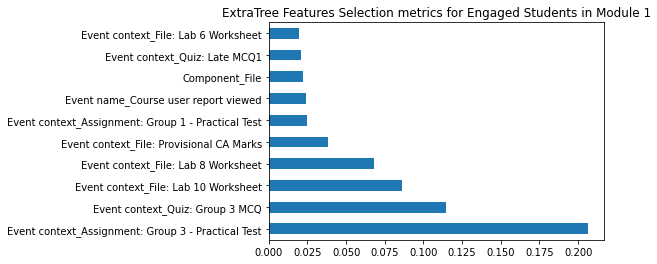

In [111]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X1s,y1s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1s.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('ExtraTree Features Selection metrics for Engaged Students in Module 1')
plt.show()


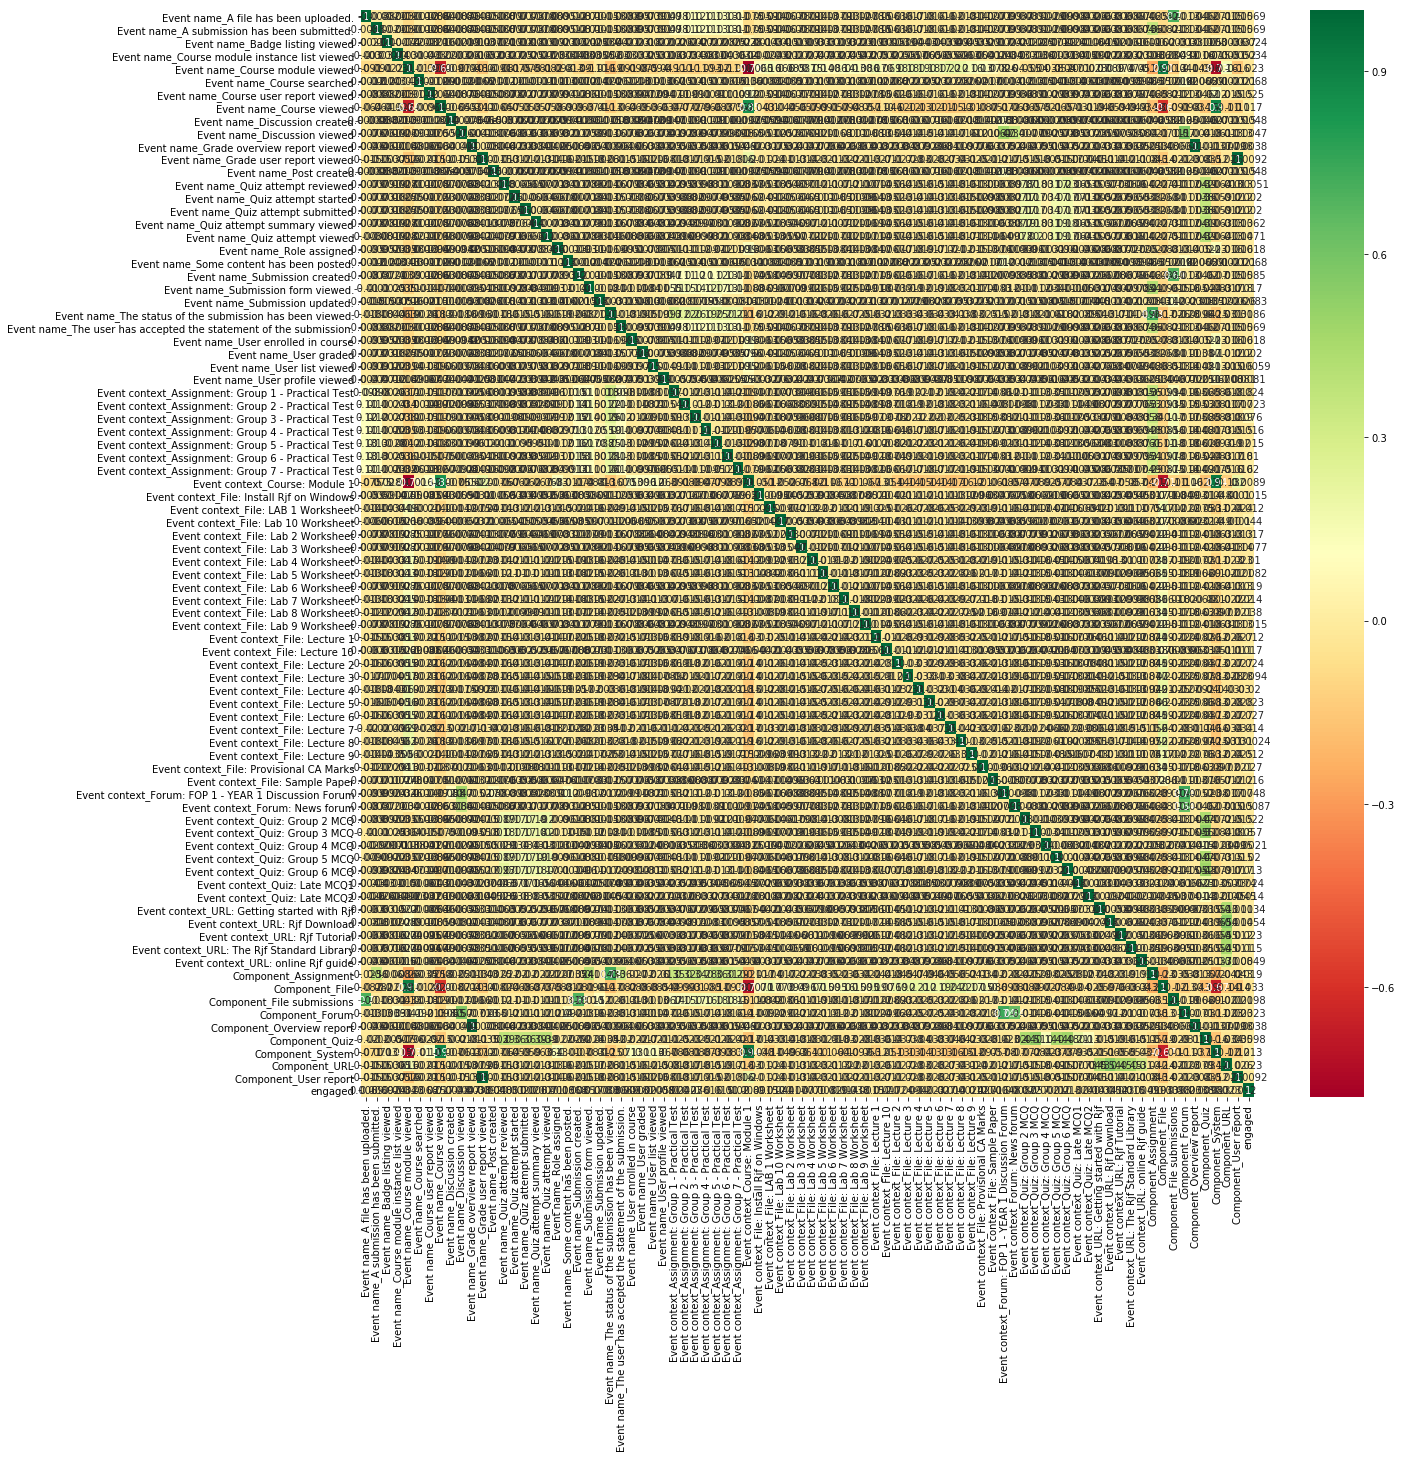

In [130]:
#get correlations of each features in dataset
corrmat = merge_subset1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset1[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [112]:
featselect1 = X1s[['Event context_Assignment: Group 3 - Practical Test','Event context_Quiz: Group 3 MCQ','Event context_File: Lab 10 Worksheet','Event context_File: Lab 8 Worksheet','Event context_File: Provisional CA Marks','Event context_Assignment: Group 1 - Practical Test','Event name_Course user report viewed','Component_File','Event context_File: Lecture 6','Event context_File: Lab 6 Worksheet']]


In [113]:
featselect1.head(2)

Event context_Assignment: Group 3 - Practical Test  \
0                                                  0    
1                                                  0    

   Event context_Quiz: Group 3 MCQ  Event context_File: Lab 10 Worksheet  \
0                                0                                     0   
1                                0                                     0   

   Event context_File: Lab 8 Worksheet  \
0                                    0   
1                                    0   

   Event context_File: Provisional CA Marks  \
0                                         0   
1                                         0   

   Event context_Assignment: Group 1 - Practical Test  \
0                                                  0    
1                                                  0    

   Event name_Course user report viewed  Component_File  \
0                                     0               0   
1                                     0               0   

   Event context_File: Lecture 6  Event context_File: Lab 6 Worksheet  
0                              0                                    0  
1                              0                                    0

In [114]:
Xfs = featselect1 # Features
yfs = y1s # Target variable

In [199]:
#yfs.shape()

In [115]:
yfs.head(2)

0    0
1    0
Name: engaged, dtype: int64

In [116]:
# Split dataset into training set and test set
Xfs_train, Xfs_test, yfs_train, yfs_test = train_test_split(Xfs, yfs, test_size=0.3, random_state=1) # 70% training and 30% test

In [186]:
# Create Decision Tree classifer object
dtclffs = DecisionTreeClassifier(max_depth=6)

# Train Decision Tree Classifer
dtclffs = dtclffs.fit(Xfs_train,yfs_train)

#Predict the response for test dataset
yfs_pred = dtclffs.predict(Xfs_test)

[Text(260.40000000000003, 201.90857142857143, 'X[0] <= 0.5\ngini = 0.333\nsamples = 8015\nvalue = [6324, 1691]'),
 Text(223.20000000000002, 170.84571428571428, 'X[1] <= 0.5\ngini = 0.329\nsamples = 7914\nvalue = [6272, 1642]'),
 Text(186.0, 139.78285714285715, 'X[4] <= 0.5\ngini = 0.326\nsamples = 7812\nvalue = [6211, 1601]'),
 Text(148.8, 108.72, 'X[3] <= 0.5\ngini = 0.324\nsamples = 7672\nvalue = [6114, 1558]'),
 Text(111.60000000000001, 77.65714285714284, 'X[6] <= 0.5\ngini = 0.321\nsamples = 7535\nvalue = [6019, 1516]'),
 Text(74.4, 46.59428571428572, 'X[2] <= 0.5\ngini = 0.323\nsamples = 7470\nvalue = [5958, 1512]'),
 Text(37.2, 15.531428571428563, 'gini = 0.322\nsamples = 7440\nvalue = [5939, 1501]'),
 Text(111.60000000000001, 15.531428571428563, 'gini = 0.464\nsamples = 30\nvalue = [19, 11]'),
 Text(148.8, 46.59428571428572, 'gini = 0.116\nsamples = 65\nvalue = [61, 4]'),
 Text(186.0, 77.65714285714284, 'gini = 0.425\nsamples = 137\nvalue = [95, 42]'),
 Text(223.20000000000002, 

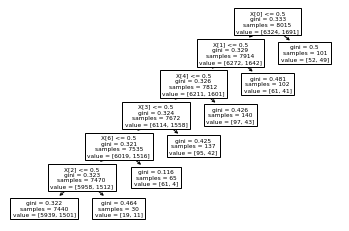

In [187]:
tree.plot_tree(dtclffs) 

In [189]:
#import graphviz 


In [188]:
# Compute accuracy
print(dtclffs.score(Xfs_train, yfs_train))

0.7890205864004991


In [158]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(dtclffs, Xfs_train, yfs_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(dtclffs, Xfs_train, yfs_train, cv = 10)
print(np.mean(cvscores_10))

0.7883968584732445
0.7883971407311933


In [119]:
print("Accuracy:",metrics.accuracy_score(yfs_test, yfs_pred))
print("Precision:",metrics.precision_score(yfs_test, yfs_pred))
print("Recall:",metrics.recall_score(yfs_test, yfs_pred))
print("F1 Score",metrics.f1_score(yfs_test, yfs_pred))

Accuracy: 0.7922002328288708
Precision: 0.0
Recall: 0.0
F1 Score 0.0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs_test, yfs_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs_test, yfs_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs_test, yfs_pred)))

Mean Absolute Error: 0.207799767171
Mean Squared Error: 0.207799767171
Root Mean Squared Error: 0.455850597423


In [120]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs1 = LogisticRegression()

# fit the model with data
logregfs1.fit(Xfs_train,yfs_train)

#
ylg1_pred=logregfs1.predict(Xfs_test)


In [121]:
# Compute accuracy
print(logregfs1.score(Xfs_train, yfs_train))

0.7890205864004991


In [122]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(logregfs1, Xfs_train, yfs_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(logregfs1, Xfs_train, yfs_train, cv = 10)
print(np.mean(cvscores_10))

0.7890206109682545
0.789020582127702


In [123]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs_test, ylg1_pred))
print(classification_report(yfs_test, ylg1_pred))
#plt.title('Confusion matrix and Classification Report for Engaged students in Module 1')


[[2722    0]
 [ 714    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2722
           1       0.00      0.00      0.00       714

    accuracy                           0.79      3436
   macro avg       0.40      0.50      0.44      3436
weighted avg       0.63      0.79      0.70      3436



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
# import the metrics class
from sklearn import metrics
cnflr1_matrix = metrics.confusion_matrix(yfs_test, ylg1_pred)
cnflr1_matrix


array([[2722,    0],
       [ 714,    0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

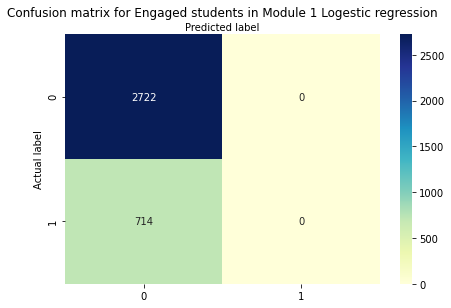

In [125]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnflr1_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Engaged students in Module 1 Logestic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


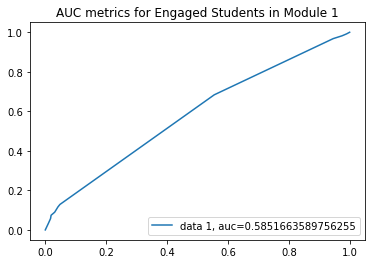

In [126]:
ylg1_pred_proba = logregfs1.predict_proba(Xfs_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yfs_test,  ylg1_pred_proba)
auc = metrics.roc_auc_score(yfs_test, ylg1_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('AUC metrics for Engaged Students in Module 1')
plt.show()
# AUC score for the case is 0.58. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


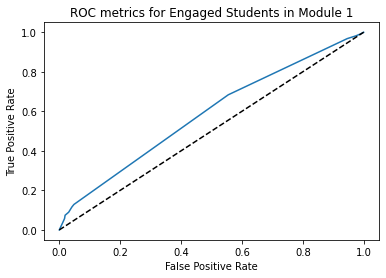

In [127]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yfs_test, ylg1_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Engaged Students in Module 1')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [128]:

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logregfs1, Xfs_train, yfs_train, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC scores computed using 5-fold cross-validation: [0.55394555 0.56553313 0.53579882 0.56176649 0.54171101]


In [198]:
# Instantiate the classifier
rfclffs1 = RandomForestClassifier(n_estimators = 20,)

# Fit to the training data
rfclffs1.fit(Xfs_train, yfs_train)

# Compute accuracy
print(rfclffs1.score(Xfs_test, yfs_test))


0.7922002328288708


In [130]:
cvscores_10rf = cross_val_score(rfclffs1, Xfs_train, yfs_train, cv = 10)
print(np.mean(cvscores_10rf))

0.7878979206166855


In [190]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(rfclffs1, param_grid)

# Fit the model
grid_search.fit(Xfs_test,yfs_test)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs=None,
                                              oob_score=False,
                                              ran

In [191]:
# To identify the best hyperparameters.
grid_search.best_params_


{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 3}

In [199]:
from sklearn.svm import SVC

svcfs1 = SVC(kernel='linear',C=0.1)

#Train it, or "fit it", to the data:
svcfs1.fit(Xfs_train, yfs_train)

# Compute accuracy
print(svcfs1.score(Xfs_test, yfs_test))


0.7922002328288708


In [196]:
cvscores_10svc = cross_val_score(svcfs1, Xfs_train, yfs_train, cv = 10)
print(np.mean(cvscores_10svc))

0.7883971407311933


In [194]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'kernel': ['linear', 'poly', 'rbf']}

# Call GridSearchCV
grid_search = GridSearchCV(svcfs1, param_grid)

# Fit the model
grid_search.fit(Xfs_test, yfs_test)

# Print the optimal parameters
print(grid_search.best_params_)


{'kernel': 'linear'}


In [133]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yfs_test, ylg1_pred))
print(classification_report(yfs_test, ylg1_pred))


[[2722    0]
 [ 714    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2722
           1       0.00      0.00      0.00       714

    accuracy                           0.79      3436
   macro avg       0.40      0.50      0.44      3436
weighted avg       0.63      0.79      0.70      3436



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
import sklearn.metrics as metrics

In [147]:
from sklearn.metrics import accuracy_score 

In [145]:
#import sklearn.metrics import accuracy_score 

In [152]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xfs_train, yfs_train)

# Predict
bagged_pred = bagged_model.predict(Xfs_test)

#print(logregfs1.score(Xfs_train, yfs_train))

# Print accuracy score
print(accuracy_score(yfs_test, bagged_pred))


0.7922002328288708


In [153]:
# Print accuracy score
print(bagged_model.score(Xfs_train, yfs_train))


0.7890205864004991


In [202]:
# Print model accuracy
#print(accuracy_score(yfs_test, bagged_pred))


In [154]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(Xfs_train, yfs_train)

# Predict
boosted_pred = boosted_model_fit.predict(Xfs_test)

# Print model accuracy
print(accuracy_score(yfs_test, boosted_pred))


0.7922002328288708


In [155]:
print(accuracy_score(yfs_test, boosted_pred))

0.7922002328288708


In [140]:
# Print accuracy score
print(boosted_model.score(Xfs_train, yfs_train))


0.7890205864004991


In [156]:
import xgboost as xgb

In [157]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(Xfs_train, yfs_train)

# Predict
xgb_pred = xgb.predict(Xfs_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(yfs_test, xgb_pred))


Final prediction score: [0.79220023]


In [196]:
# Print accuracy score
#print(accuracy_score(yfs_test, bagged_pred))


In [195]:
#yfs_train.shape()

In [192]:
#yfs_test.shape()

In [188]:
#print(bagged_model.score(yfs_test, bagged_pred))

In [160]:
#print(bagged_model.score(yfs_test, bagged_pred))

In [ ]:
#Trimester1

In [161]:
FirstFive1.head(2)

Time User full name               Event context Component  \
3704   23:55      ap1Y bpWX  File: Provisional CA Marks      File   
3705   23:55      ap1Y bpWX  File: Provisional CA Marks      File   

                Event name       Date First name Last name  
3704  Course module viewed 2018-10-12       ap1Y      bpWX  
3705  Course module viewed 2018-10-12       ap1Y      bpWX

In [160]:
FirstFive1 = FirstFive1.drop(FirstFive1[['IP address','Origin','Description','Affected user']], axis=1)


KeyError: "None of [Index(['IP address', 'Origin', 'Description', 'Affected user'], dtype='object')] are in the [columns]"

In [162]:
FirstFive1.head(2)

Time User full name               Event context Component  \
3704   23:55      ap1Y bpWX  File: Provisional CA Marks      File   
3705   23:55      ap1Y bpWX  File: Provisional CA Marks      File   

                Event name       Date First name Last name  
3704  Course module viewed 2018-10-12       ap1Y      bpWX  
3705  Course module viewed 2018-10-12       ap1Y      bpWX

In [163]:
FirstFive1_onehot = FirstFive1.copy()
FirstFive1_onehot = pd.get_dummies(FirstFive1_onehot, columns=['Event name'], prefix = ['Event name'])
FirstFive1_onehot = pd.get_dummies(FirstFive1_onehot, columns=['Event context'], prefix = ['Event context'])
FirstFive1_onehot = pd.get_dummies(FirstFive1_onehot, columns=['Component'], prefix = ['Component'])


print(FirstFive1_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data



        Time User full name       Date First name Last name  \
3704   23:55      ap1Y bpWX 2018-10-12       ap1Y      bpWX   
3705   23:55      ap1Y bpWX 2018-10-12       ap1Y      bpWX   
3706   23:52      af9A bQxP 2018-10-12       af9A      bQxP   
3707   23:39      aLoB b4wd 2018-10-12       aLoB      b4wd   
3708   23:39      aLoB b4wd 2018-10-12       aLoB      b4wd   

      Event name_Badge listing viewed  \
3704                                0   
3705                                0   
3706                                0   
3707                                0   
3708                                0   

      Event name_Course module instance list viewed  \
3704                                              0   
3705                                              0   
3706                                              0   
3707                                              0   
3708                                              0   

      Event name_Course module viewed  Even

In [200]:
FirstFive1_onehot.head(2)

Time User full name       Date First name Last name  \
3704   23:55      ap1Y bpWX 2018-10-12       ap1Y      bpWX   
3705   23:55      ap1Y bpWX 2018-10-12       ap1Y      bpWX   

      Event name_Badge listing viewed  \
3704                                0   
3705                                0   

      Event name_Course module instance list viewed  \
3704                                              0   
3705                                              0   

      Event name_Course module viewed  Event name_Course searched  \
3704                                1                           0   
3705                                1                           0   

      Event name_Course user report viewed  ...  \
3704                                     0  ...   
3705                                     0  ...   

      Event context_URL: Rjf Download  Event context_URL: Rjf Tutorial  \
3704                                0                                0   
3705                                0                                0   

      Event context_URL: The Rjf Standard Library  Component_File  \
3704                                            0               1   
3705                                            0               1   

      Component_Forum  Component_Overview report  Component_Quiz  \
3704                0                          0               0   
3705                0                          0               0   

      Component_System  Component_URL  Component_User report  
3704                 0              0                      0  
3705                 0              0                      0  

[2 rows x 63 columns]

In [201]:
merge_subset1_tri = pd.merge(FirstFive1_onehot,m1mg_subset[['First name','engaged']],on='First name', how='left')


In [202]:
merge_subset1_tri.head(2)

Time User full name       Date First name Last name  \
0   23:55      ap1Y bpWX 2018-10-12       ap1Y      bpWX   
1   23:55      ap1Y bpWX 2018-10-12       ap1Y      bpWX   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  Event name_Course searched  \
0                                1                           0   
1                                1                           0   

   Event name_Course user report viewed  ...  Event context_URL: Rjf Tutorial  \
0                                     0  ...                                0   
1                                     0  ...                                0   

   Event context_URL: The Rjf Standard Library  Component_File  \
0                                            0               1   
1                                            0               1   

   Component_Forum  Component_Overview report  Component_Quiz  \
0                0                          0               0   
1                0                          0               0   

   Component_System  Component_URL  Component_User report  engaged  
0                 0              0                      0        0  
1                 0              0                      0        0  

[2 rows x 64 columns]

In [203]:
X51s = merge_subset1_tri.iloc[:,5:63]  #independent columns
y51s = merge_subset1_tri.iloc[:,-1]    #target column i.e engaged


In [204]:
X51s.head(2)

Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed  Event name_Course searched  \
0                                1                           0   
1                                1                           0   

   Event name_Course user report viewed  Event name_Course viewed  \
0                                     0                         0   
1                                     0                         0   

   Event name_Discussion viewed  Event name_Grade overview report viewed  \
0                             0                                        0   
1                             0                                        0   

   Event name_Grade user report viewed  Event name_Quiz attempt reviewed  ...  \
0                                    0                                 0  ...   
1                                    0                                 0  ...   

   Event context_URL: Rjf Download  Event context_URL: Rjf Tutorial  \
0                                0                                0   
1                                0                                0   

   Event context_URL: The Rjf Standard Library  Component_File  \
0                                            0               1   
1                                            0               1   

   Component_Forum  Component_Overview report  Component_Quiz  \
0                0                          0               0   
1                0                          0               0   

   Component_System  Component_URL  Component_User report  
0                 0              0                      0  
1                 0              0                      0  

[2 rows x 58 columns]

In [205]:
y51s.head(2)

0    0
1    0
Name: engaged, dtype: int64

In [206]:

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X51s,y51s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X51s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36


                                          Specs      Score
45              Event context_Quiz: Group 3 MCQ  25.818514
44              Event context_Quiz: Group 2 MCQ   8.212498
41     Event context_File: Provisional CA Marks   7.777992
56                                Component_URL   7.480575
49              Event context_URL: Rjf Tutorial   5.473475
23          Event context_File: Lab 2 Worksheet   4.138820
51                               Component_File   3.921489
54                               Component_Quiz   3.854703
50  Event context_URL: The Rjf Standard Library   3.791485
21          Event context_File: LAB 1 Worksheet   3.179918


[0.00043494 0.00193012 0.01460423 0.0049271  0.02935734 0.00517109
 0.00844982 0.00132364 0.00092489 0.00511049 0.00128115 0.00118707
 0.0115143  0.01279484 0.00195041 0.00219779 0.00372987 0.00037144
 0.00111715 0.01133436 0.0021084  0.01510877 0.03753035 0.03408173
 0.00335721 0.01361652 0.00126357 0.0077804  0.0052718  0.00812457
 0.01116128 0.00352181 0.00109044 0.0025996  0.01457798 0.00474379
 0.00129211 0.02020966 0.01666253 0.01700111 0.01691588 0.09918855
 0.00373487 0.00503399 0.09463044 0.22502733 0.02157269 0.00378991
 0.00865819 0.02873941 0.01901872 0.03116265 0.00512278 0.00144138
 0.03010794 0.00818573 0.05585293 0.00100096]


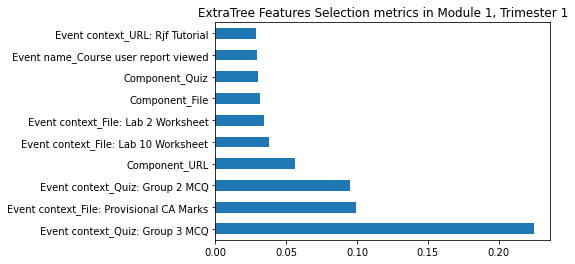

In [207]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X51s,y51s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.title('ExtraTree Features Selection metrics in Module 1, Trimester 1')
feat_importances = pd.Series(model.feature_importances_, index=X51s.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


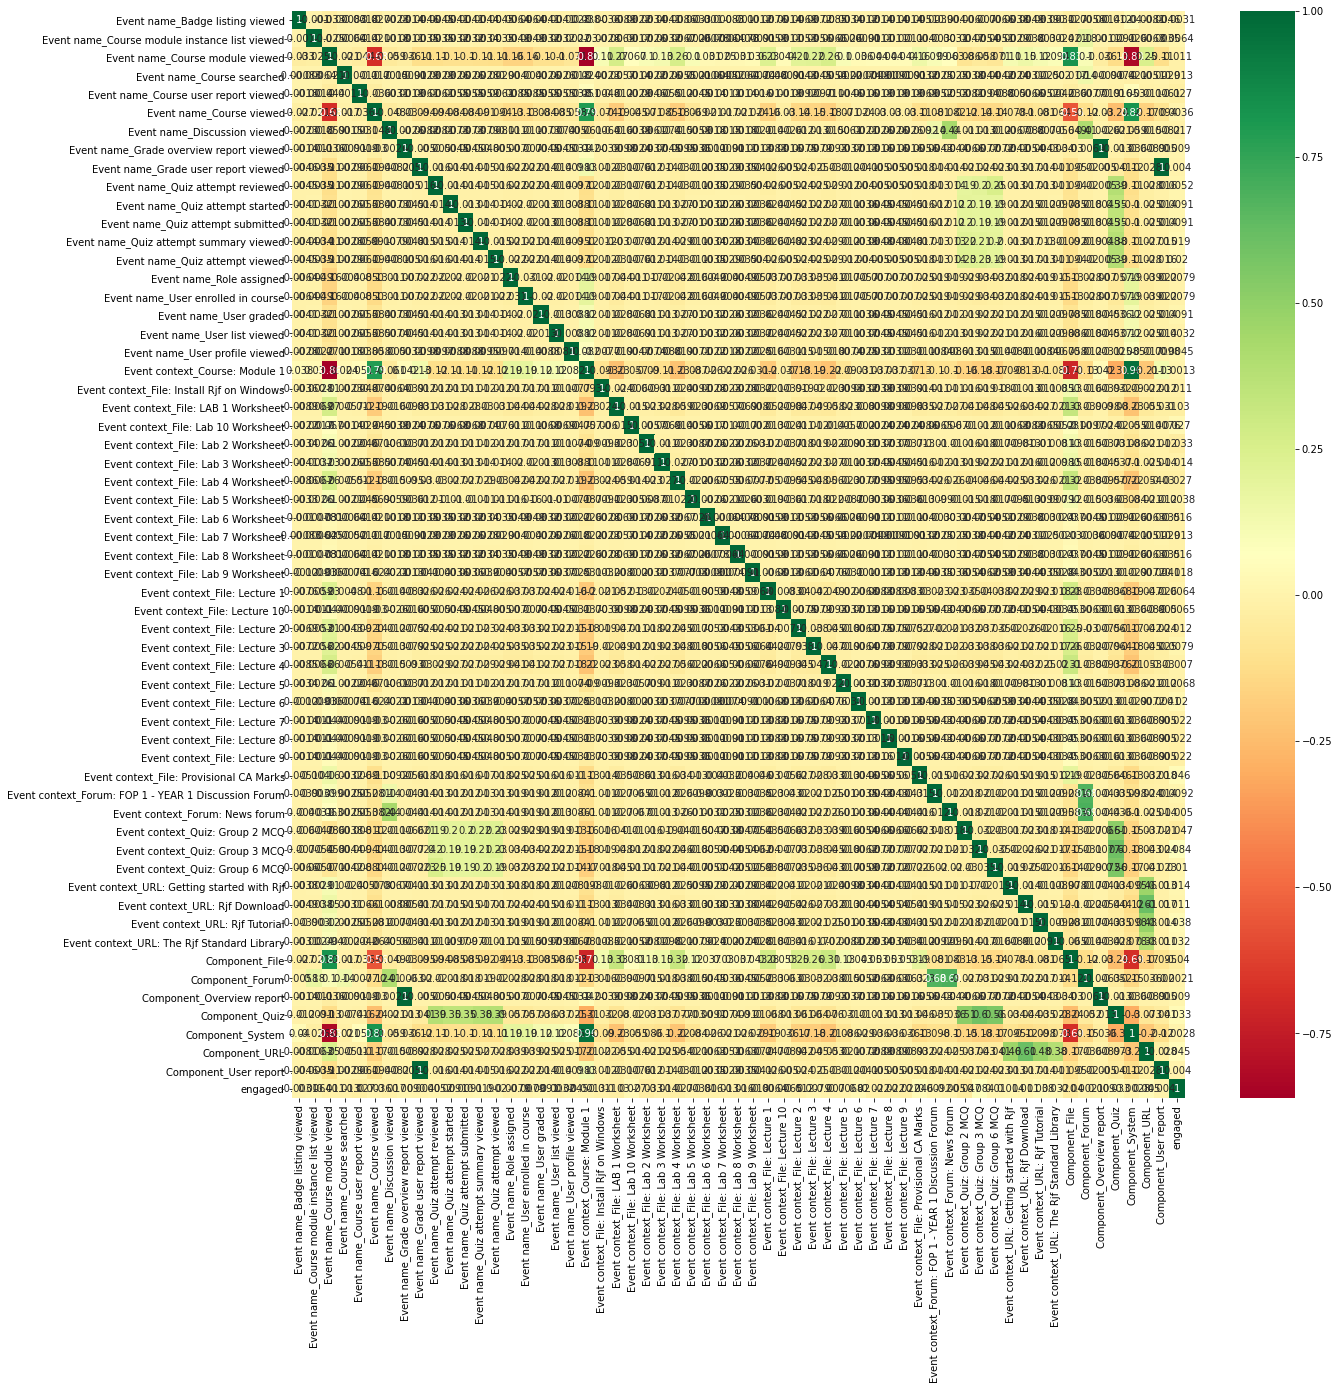

In [208]:
#get correlations of each features in dataset
corrmat = merge_subset1_tri.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset1_tri[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [209]:
X51s.columns

Index(['Event name_Badge listing viewed',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed', 'Event name_Course searched',
       'Event name_Course user report viewed', 'Event name_Course viewed',
       'Event name_Discussion viewed',
       'Event name_Grade overview report viewed',
       'Event name_Grade user report viewed',
       'Event name_Quiz attempt reviewed', 'Event name_Quiz attempt started',
       'Event name_Quiz attempt submitted',
       'Event name_Quiz attempt summary viewed',
       'Event name_Quiz attempt viewed', 'Event name_Role assigned',
       'Event name_User enrolled in course', 'Event name_User graded',
       'Event name_User list viewed', 'Event name_User profile viewed',
       'Event context_Course: Module 1',
       'Event context_File: Install Rjf on Windows',
       'Event context_File: LAB 1 Worksheet',
       'Event context_File: Lab 10 Worksheet',
       'Event context_File: Lab 2 Worksheet',
    

In [ ]:
#                                          Specs      Score
#45              Event context_Quiz: Group 3 MCQ  25.818514
#44              Event context_Quiz: Group 2 MCQ   8.212498
#41     Event context_File: Provisional CA Marks   7.777992
#56                                Component_URL   7.480575
#49              Event context_URL: Rjf Tutorial   5.473475
#23          Event context_File: Lab 2 Worksheet   4.138820
#51                               Component_File   3.921489
#54                               Component_Quiz   3.854703
#50  Event context_URL: The Rjf Standard Library   3.791485
#21          Event context_File: LAB 1 Worksheet   3.179918

In [210]:
feattime51 = X51s[['Event context_Quiz: Group 3 MCQ','Event context_Quiz: Group 2 MCQ','Event context_File: Provisional CA Marks','Component_URL','Event context_URL: Rjf Tutorial','Event context_File: Lab 2 Worksheet','Component_File','Component_Quiz','Event context_URL: The Rjf Standard Library','Event context_File: LAB 1 Worksheet']]

In [211]:
Xt1a = feattime51 # Features
yt1a = y51s # Target variable

In [212]:
# Create training and testing sets
Xt1a_train, Xt1a_test, yt1a_train, yt1a_test = train_test_split(Xt1a, yt1a, test_size=0.3)


In [178]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregt1a = LogisticRegression()

# fit the model with data
logregt1a.fit(Xt1a_train,yt1a_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [179]:
# Compute accuracy
print(logregt1a.score(Xt1a_test, yt1a_test))

0.771304347826


In [180]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(logregt1a, Xt1a_train, yt1a_train, cv = 3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(logregt1a, Xt1a_train, yt1a_train, cv = 10)
print(np.mean(cvscores_10))

0.760164407214
0.760166233699


In [181]:
yt1a_pred=logregt1a.predict(Xt1a_test)

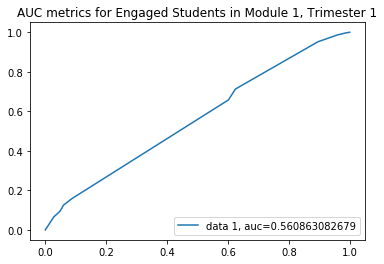

In [227]:
ylg1a_pred_proba = logregt1a.predict_proba(Xt1a_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt1a_test,  ylg1a_pred_proba)
auc = metrics.roc_auc_score(yt1a_test, ylg1a_pred_proba)
plt.title('AUC metrics for Engaged Students in Module 1, Trimester 1')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# AUC score for the case is 0.56. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
#


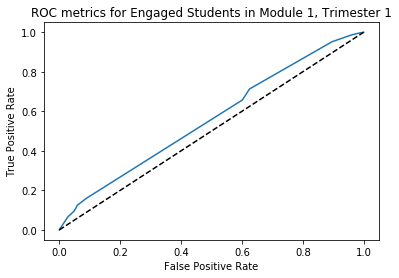

In [228]:
# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(yt1a_test, ylg1a_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.title('ROC metrics for Engaged Students in Module 1, Trimester 1')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()


In [229]:
# Perform 10-fold CV
cvscores_1a = cross_val_score(logregt1a, Xt1a_train, yt1a_train, cv = 10)
print(np.mean(cvscores_1a))

0.769864380532


In [230]:
print("Accuracy:",metrics.accuracy_score(yt1a_test, yt1a_pred))
print("Precision:",metrics.precision_score(yt1a_test, yt1a_pred))
print("Recall:",metrics.recall_score(yt1a_test, yt1a_pred))
print("F1 Score",metrics.f1_score(yt1a_test, yt1a_pred))


Accuracy: 0.748695652174
Precision: 0.0
Recall: 0.0
F1 Score 0.0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [231]:
# Instantiate the classifier
rfclffs1a = RandomForestClassifier(n_estimators = 20,criterion = "gini",max_depth = 3,bootstrap ='True')

# Fit to the training data
rfclffs1a.fit(Xt1a_train, yt1a_train)

# Compute accuracy
print(rfclffs1a.score(Xt1a_test, yt1a_test))


0.768695652173913


In [223]:
# Perform 10-fold CV
cvscores_10rf = cross_val_score(rfclffs1a, Xt1a_train, yt1a_train, cv = 10)
print(np.mean(cvscores_10rf))

0.7605365366476169


In [224]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(rfclffs1a, param_grid)

# Fit the model
grid_search.fit(Xt1a_test,yt1a_test)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=20, n_jobs=None,
                                              oob_score=False,
                                              ran

In [225]:
# To identify the best hyperparameters.
grid_search.best_params_


{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 1}

In [219]:
from sklearn.svm import SVC

svcfs1a = SVC(kernel='linear',C=0.1)

#Train it, or "fit it", to the data:
svcfs1a.fit(Xt1a_train, yt1a_train)

# Compute accuracy
print(svcfs1a.score(Xt1a_test, yt1a_test))


0.768695652173913


In [220]:
# Perform 10-fold CV
cvscores_10svc = cross_val_score(svcfs1a, Xt1a_train, yt1a_train, cv = 10)
print(np.mean(cvscores_10svc))

0.7612828053043333


In [217]:

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'kernel': ['linear', 'poly', 'rbf']}

# Call GridSearchCV
grid_search = GridSearchCV(svcfs1a, param_grid)

# Fit the model
grid_search.fit(Xt1a_test, yt1a_test)

# Print the optimal parameters
print(grid_search.best_params_)



{'kernel': 'linear'}


In [235]:
# Create Decision Tree classifer object
dtclffs1a = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs1a = dtclffs1a.fit(Xt1a_train,yt1a_train)

#Predict the response for test dataset
yfs1a_pred = dtclffs1a.predict(Xt1a_test)


In [258]:
# Compute accuracy
print(dtclffs1a.score(Xt1a_test, yt1a_test))

0.748695652174


In [236]:
# Perform 10-fold CV
cvscores_10dt1a = cross_val_score(dtclffs1a, Xt1a_train, yt1a_train, cv = 10)
print(np.mean(cvscores_10dt1a))

0.769864380532


In [237]:
# Generate the confusion matrix and classification report
print(confusion_matrix(yt1a_test, yt1a_pred))
print(classification_report(yt1a_test, yt1a_pred))


[[861   0]
 [289   0]]
             precision    recall  f1-score   support

          0       0.75      1.00      0.86       861
          1       0.00      0.00      0.00       289

avg / total       0.56      0.75      0.64      1150



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [182]:
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(Xt1a_train, yt1a_train)

# Predict
bagged_pred = bagged_model.predict(Xt1a_test)

# Print accuracy score
#print(accuracy_score(yt1a_test, bagged_pred))
# Print accuracy score
print(bagged_model.score(Xt1a_train, yt1a_train))


0.760164117866


In [183]:
print(bagged_model.score(Xt1a_test, yt1a_test))

0.771304347826


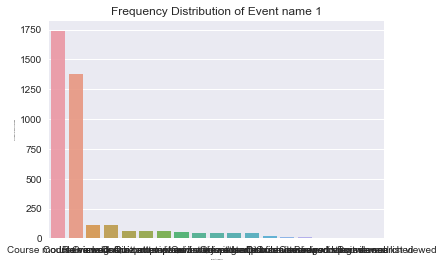

In [238]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
eventname1_count = FirstFive1['Event name'].value_counts()
sns.set(style="darkgrid")
sns.barplot(eventname1_count.index, eventname1_count.values, alpha=0.9)
plt.title('Frequency Distribution of Event name 1')
plt.ylabel('Number of Occurrences', fontsize=2)
plt.xlabel('Event name 1', fontsize=2)
plt.show()

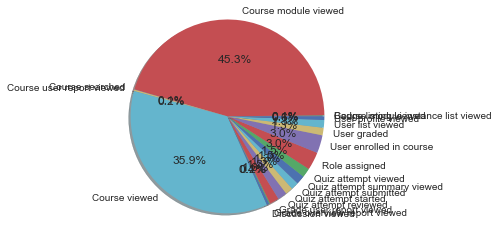

In [239]:
labels = FirstFive1['Event name'].astype('category').cat.categories.tolist()
counts = FirstFive1['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [240]:
module1lg.head(2)

id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)  \
0  105   iV38mp5J  bmp5, aV38    33      37     35.0                 35   
1   38   wTka80ff  b80f, aTka    44      46     45.0                 45   

   Engaged Students Module 1  
0                      False  
1                      False

In [241]:
chi = stats.chisquare(engaged1)
print(chi)

Power_divergenceResult(statistic=68.0, pvalue=0.98012336988987858)


In [242]:
# Is the result significant?
alpha = 0.05
if chi[1] < alpha:
    print("Proportions of engagement differ significantly")
else:
    print("No significant difference in proportions of engagement found")

No significant difference in proportions of engagement found


In [243]:
engaged1.sum()

27

In [244]:
spear4 = Xt1a['Event context_Quiz: Group 3 MCQ']

In [245]:
spear44 = yt1a

In [246]:
spearcorr = stats.spearmanr(spear4,spear44)
print(spearcorr)

SpearmanrResult(correlation=0.083613416942490956, pvalue=2.1875928588282807e-07)


In [247]:
merge_subset1

Time User full name       Date First name Last name  \
0       21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
1       21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
2       21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
3       21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
4       20:29      ansW buTW 2019-01-21       ansW      buTW   
5       19:54      aKpv bLk6 2019-01-21       aKpv      bLk6   
6       19:54      aKpv bLk6 2019-01-21       aKpv      bLk6   
7       19:11      ansW buTW 2019-01-21       ansW      buTW   
8       19:07      ansW buTW 2019-01-21       ansW      buTW   
9       19:05      asqg bbCp 2019-01-21       asqg      bbCp   
10      19:05      asqg bbCp 2019-01-21       asqg      bbCp   
11      18:53      a8NM bDqB 2019-01-21       a8NM      bDqB   
12      18:26      a58K bM4Z 2019-01-21       a58K      bM4Z   
13      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
14      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
15      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
16      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
17      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
18      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
19      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
20      15:10      ajrV bTes 2019-01-21       ajrV      bTes   
21      15:10      ajrV bTes 2019-01-21       ajrV      bTes   
22      14:27      aiGp b3wt 2019-01-21       aiGp      b3wt   
23      14:27      aiGp b3wt 2019-01-21       aiGp      b3wt   
24      14:19      ajrV bTes 2019-01-21       ajrV      bTes   
25      14:18      ajrV bTes 2019-01-21       ajrV      bTes   
26      14:13      ajrV bTes 2019-01-21       ajrV      bTes   
27      13:51      ajrV bTes 2019-01-21       ajrV      bTes   
28      13:48      ajrV bTes 2019-01-21       ajrV      bTes   
29      13:47      ajrV bTes 2019-01-21       ajrV      bTes   
...       ...            ...        ...        ...       ...   
11421   14:25      a322 bSXp 2018-09-19       a322      bSXp   
11422   14:24      a322 bSXp 2018-09-19       a322      bSXp   
11423   14:24      a322 bSXp 2018-09-19       a322      bSXp   
11424   14:24      a0V1 b1X9 2018-09-19       a0V1      b1X9   
11425   14:24      a0V1 b1X9 2018-09-19       a0V1      b1X9   
11426   14:24      a0V1 b1X9 2018-09-19       a0V1      b1X9   
11427   14:24      aK80 bFqH 2018-09-19       aK80      bFqH   
11428   14:24      a2mi bDko 2018-09-19       a2mi      bDko   
11429   14:24      a2mi bDko 2018-09-19       a2mi      bDko   
11430   14:24      a2mi bDko 2018-09-19       a2mi      bDko   
11431   14:24      aK80 bFqH 2018-09-19       aK80      bFqH   
11432   14:24      aK80 bFqH 2018-09-19       aK80      bFqH   
11433   14:24      asqg bbCp 2018-09-19       asqg      bbCp   
11434   14:24      aUzU bZxm 2018-09-19       aUzU      bZxm   
11435   14:23      aUzU bZxm 2018-09-19       aUzU      bZxm   
11436   14:23      aUzU bZxm 2018-09-19       aUzU      bZxm   
11437   14:23      aW89 binL 2018-09-19       aW89      binL   
11438   14:23      aW89 binL 2018-09-19       aW89      binL   
11439   14:23      aW89 binL 2018-09-19       aW89      binL   
11440   14:23      aeCe bABp 2018-09-19       aeCe      bABp   
11441   14:23      aeCe bABp 2018-09-19       aeCe      bABp   
11442   14:23      aeCe bABp 2018-09-19       aeCe      bABp   
11443   14:23      asqg bbCp 2018-09-19       asqg      bbCp   
11444   14:23      asqg bbCp 2018-09-19       asqg      bbCp   
11445   14:23      asqg bbCp 2018-09-19       asqg      bbCp   
11446   14:23      an00 bEQ2 2018-09-19       an00      bEQ2   
11447   14:23      an00 bEQ2 2018-09-19       an00      bEQ2   
11448   14:23      an00 bEQ2 2018-09-19       an00      bEQ2   
11449   14:23      aglU bwda 2018-09-19       aglU      bwda   
11450   14:23      aglU bwda 2018-09-19       aglU      bwda   

       Event name_A file has been upload

In [248]:
merge_subset1.groupby(['engaged']).std()

Event name_A file has been uploaded.  \
engaged                                         
0                                    0.091279   
1                                    0.099417   

         Event name_A submission has been submitted.  \
engaged                                                
0                                           0.091279   
1                                           0.099417   

         Event name_Badge listing viewed  \
engaged                                    
0                               0.023505   
1                               0.020391   

         Event name_Course module instance list viewed  \
engaged                                                  
0                                             0.033232   
1                                             0.028831   

         Event name_Course module viewed  Event name_Course searched  \
engaged                                                                
0                               0.499937                    0.014868   
1                               0.498717                    0.000000   

         Event name_Course user report viewed  Event name_Course viewed  \
engaged                                                                   
0                                    0.098706                  0.463722   
1                                    0.064362                  0.470961   

         Event name_Discussion created  Event name_Discussion viewed  \
engaged                                                                
0                             0.010514                      0.081845   
1                             0.000000                      0.076090   

                 ...            Event context_URL: online Rjf guide  \
engaged          ...                                                  
0                ...                                       0.048128   
1                ...                                       0.053883   

         Component_Assignment  Component_File  Component_File submissions  \
engaged                                                                     
0                    0.242599        0.496889                    0.128540   
1                    0.262521        0.490749                    0.139886   

         Component_Forum  Component_Overview report  Component_Quiz  \
engaged                                                               
0               0.140038                   0.050362        0.204362   
1               0.142710                   0.045558        0.215177   

         Component_System  Component_URL  Component_User report  
engaged                                                          
0                0.480426       0.149186               0.159079  
1                0.484557       0.174971               0.148183  

[2 rows x 83 columns]

In [249]:
merge_subset1.groupby(['engaged']).mean()

Event name_A file has been uploaded.  \
engaged                                         
0                                    0.008402   
1                                    0.009979   

         Event name_A submission has been submitted.  \
engaged                                                
0                                           0.008402   
1                                           0.009979   

         Event name_Badge listing viewed  \
engaged                                    
0                               0.000553   
1                               0.000416   

         Event name_Course module instance list viewed  \
engaged                                                  
0                                             0.001105   
1                                             0.000832   

         Event name_Course module viewed  Event name_Course searched  \
engaged                                                                
0                               0.490493                    0.000221   
1                               0.462786                    0.000000   

         Event name_Course user report viewed  Event name_Course viewed  \
engaged                                                                   
0                                    0.009839                  0.312956   
1                                    0.004158                  0.331809   

         Event name_Discussion created  Event name_Discussion viewed  \
engaged                                                                
0                             0.000111                      0.006743   
1                             0.000000                      0.005821   

                 ...            Event context_URL: online Rjf guide  \
engaged          ...                                                  
0                ...                                       0.002321   
1                ...                                       0.002911   

         Component_Assignment  Component_File  Component_File submissions  \
engaged                                                                     
0                    0.062790        0.444064                    0.016803   
1                    0.074428        0.403742                    0.019958   

         Component_Forum  Component_Overview report  Component_Quiz  \
engaged                                                               
0               0.020009                   0.002543        0.043666   
1               0.020790                   0.002079        0.048649   

         Component_System  Component_URL  Component_User report  
engaged                                                          
0                0.361375       0.022772               0.025978  
1                0.376299       0.031601               0.022453  

[2 rows x 83 columns]

In [250]:
merge_subset1_tri.groupby(['engaged']).mean()

Event name_Badge listing viewed  \
engaged                                    
0                               0.001368   
1                               0.001104   

         Event name_Course module instance list viewed  \
engaged                                                  
0                                             0.000684   
1                                             0.001104   

         Event name_Course module viewed  Event name_Course searched  \
engaged                                                                
0                               0.456068                    0.000684   
1                               0.442605                    0.000000   

         Event name_Course user report viewed  Event name_Course viewed  \
engaged                                                                   
0                                    0.003077                  0.357949   
1                                    0.000000                  0.362031   

         Event name_Discussion viewed  \
engaged                                 
0                            0.004786   
1                            0.002208   

         Event name_Grade overview report viewed  \
engaged                                            
0                                       0.001368   
1                                       0.002208   

         Event name_Grade user report viewed  \
engaged                                        
0                                   0.015385   
1                                   0.016556   

         Event name_Quiz attempt reviewed          ...            \
engaged                                            ...             
0                                0.015043          ...             
1                                0.016556          ...             

         Event context_URL: Rjf Download  Event context_URL: Rjf Tutorial  \
engaged                                                                     
0                               0.017436                         0.009231   
1                               0.020971                         0.018764   

         Event context_URL: The Rjf Standard Library  Component_File  \
engaged                                                                
0                                           0.005812        0.371966   
1                                           0.012141        0.326711   

         Component_Forum  Component_Overview report  Component_Quiz  \
engaged                                                               
0               0.024615                   0.001368        0.089573   
1               0.025386                   0.002208        0.112583   

         Component_System  Component_URL  Component_User report  
engaged                                                          
0                0.454701       0.042393               0.015385  
1                0.451435       0.065121               0.016556  

[2 rows x 58 columns]

In [251]:
Powerfeatselect1 = merge_subset1[['Event context_Assignment: Group 3 - Practical Test','Event context_Quiz: Group 3 MCQ','Event context_File: Lab 10 Worksheet','Event context_File: Lab 8 Worksheet','Event context_File: Provisional CA Marks','Event context_Assignment: Group 1 - Practical Test','Event name_Course user report viewed','Component_File','Event context_File: Lecture 6','Event context_File: Lab 6 Worksheet','engaged']]


In [252]:
Powerfeatselect1.groupby(['engaged']).mean()

Event context_Assignment: Group 3 - Practical Test  \
engaged                                                       
0                                                 0.008844    
1                                                 0.030353    

         Event context_Quiz: Group 3 MCQ  \
engaged                                    
0                               0.008844   
1                               0.024116   

         Event context_File: Lab 10 Worksheet  \
engaged                                         
0                                    0.002653   
1                                    0.009563   

         Event context_File: Lab 8 Worksheet  \
engaged                                        
0                                   0.013708   
1                                   0.025364   

         Event context_File: Provisional CA Marks  \
engaged                                             
0                                        0.014260   
1                                        0.022453   

         Event context_Assignment: Group 1 - Practical Test  \
engaged                                                       
0                                                 0.014039    
1                                                 0.007484    

         Event name_Course user report viewed  Component_File  \
engaged                                                         
0                                    0.009839        0.444064   
1                                    0.004158        0.403742   

         Event context_File: Lecture 6  Event context_File: Lab 6 Worksheet  
engaged                                                                      
0                             0.029958                             0.006191  
1                             0.019127                             0.009979

In [234]:
average_mean = np.mean(merge_subset1)
# Compute the mean


In [235]:
print(average_mean)
# Print the results with some nice formatting


Event name_A file has been uploaded.                                 0.008733
Event name_A submission has been submitted.                          0.008733
Event name_Badge listing viewed                                      0.000524
Event name_Course module instance list viewed                        0.001048
Event name_Course module viewed                                      0.484674
Event name_Course searched                                           0.000175
Event name_Course user report viewed                                 0.008646
Event name_Course viewed                                             0.316916
Event name_Discussion created                                        0.000087
Event name_Discussion viewed                                         0.006550
Event name_Grade overview report viewed                              0.002445
Event name_Grade user report viewed                                  0.025238
Event name_Post created                                         

In [237]:
print(merge_subset1['Event context_Quiz: Group 3 MCQ'].value_counts(dropna=False))
# What are the value counts of the different marks


0    11313
1      138
Name: Event context_Quiz: Group 3 MCQ, dtype: int64


In [238]:
# Filter the election DataFrame with the high_turnout array: high_turnout_df
engaged1_df = module1lg.loc[engaged1]

In [239]:
average_mean = np.mean(engaged1_df)
# Compute the mean


In [240]:
print(average_mean)


id                   58.481481
% CA                 66.962963
% exam               72.444444
Average              69.703704
Final(Rounded Up)    69.925926
dtype: float64


In [247]:
engaged1_df

id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)
8    74   RxBNPexL  bPex, axBN    74      73     73.5                 74
13  104   gWldHxR8  bHxR, aWld    66      53     59.5                 60
16   42   xei9g2LG  bg2L, aei9    64      60     62.0                 62
18  117   qHxCglhU  bglh, aHxC    86      90     88.0                 88
19   16   z2miDkoM  bDko, a2mi    60      73     66.5                 67
20   93   CejKpyiR  bpyi, aejK    40      75     57.5                 58
25   34   J4I0KMcB  bKMc, a4I0    48      63     55.5                 56
36  122   GiG1hcIK  bhcI, aiG1    58      62     60.0                 60
37   72   ZW89inL7  binL, aW89    72      80     76.0                 76
43   18   sD2nqfdF  bqfd, aD2n    64      84     74.0                 74
46    3   tAK5SAbE  bSAb, aAK5    56      80     68.0                 68
48   26   8A6BBfkf  bBfk, aA6B    68      55     61.5                 62
51    9   btVFWWA9  bWWA, atVF    56      57     56.5                 57
55  106   mcdrMSDD  bMSD, acdr    72      70     71.0                 71
58   10   tzCYvQBD  bvQB, azCY    56      66     61.0                 61
59   44   eM4ckZLi  bkZL, aM4c    84      80     82.0                 82
60   76   TeCeABpU  bABp, aeCe    54      60     57.0                 57
61  120   bfY5OiKA  bOiK, afY5    74      62     68.0                 68
66  111   MBPmhmNk  bhmN, aBPm    74      90     82.0                 82
67   25   RYyZMB1V  bMB1, aYyZ    60      53     56.5                 57
68   94   89cr591H  b591, a9cr    72      80     76.0                 76
76   49   pKpvLk6H  bLk6, aKpv    78      90     84.0                 84
80   70   BZHfgCtV  bgCt, aZHf    76      85     80.5                 81
82    7   6L20lLYB  blLY, aL20    66      63     64.5                 65
85   15   wiEd8PqG  b8Pq, aiEd    88      88     88.0                 88
88   67   mf9AQxPA  bQxP, af9A    52      75     63.5                 64
89   55   dUzUZxmE  bZxm, aUzU    90      89     89.5                 90

In [243]:
merge_subset1.head(2)

Time User full name       Date First name Last name  \
0   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
1   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed   ...     Component_Assignment  \
0                                0   ...                        0   
1                                0   ...                        0   

   Component_File  Component_File submissions  Component_Forum  \
0               0                           0                0   
1               0                           0                0   

   Component_Overview report  Component_Quiz  Component_System  Component_URL  \
0                          0               0                 0              0   
1                          0               0                 1              0   

   Component_User report  engaged  
0                      1        0  
1                      0        0  

[2 rows x 89 columns]

In [268]:
len(merge_subset1)

11451

In [276]:
merge_subset1

Time User full name       Date First name Last name  \
0       21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
1       21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
2       21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
3       21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
4       20:29      ansW buTW 2019-01-21       ansW      buTW   
5       19:54      aKpv bLk6 2019-01-21       aKpv      bLk6   
6       19:54      aKpv bLk6 2019-01-21       aKpv      bLk6   
7       19:11      ansW buTW 2019-01-21       ansW      buTW   
8       19:07      ansW buTW 2019-01-21       ansW      buTW   
9       19:05      asqg bbCp 2019-01-21       asqg      bbCp   
10      19:05      asqg bbCp 2019-01-21       asqg      bbCp   
11      18:53      a8NM bDqB 2019-01-21       a8NM      bDqB   
12      18:26      a58K bM4Z 2019-01-21       a58K      bM4Z   
13      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
14      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
15      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
16      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
17      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
18      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
19      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
20      15:10      ajrV bTes 2019-01-21       ajrV      bTes   
21      15:10      ajrV bTes 2019-01-21       ajrV      bTes   
22      14:27      aiGp b3wt 2019-01-21       aiGp      b3wt   
23      14:27      aiGp b3wt 2019-01-21       aiGp      b3wt   
24      14:19      ajrV bTes 2019-01-21       ajrV      bTes   
25      14:18      ajrV bTes 2019-01-21       ajrV      bTes   
26      14:13      ajrV bTes 2019-01-21       ajrV      bTes   
27      13:51      ajrV bTes 2019-01-21       ajrV      bTes   
28      13:48      ajrV bTes 2019-01-21       ajrV      bTes   
29      13:47      ajrV bTes 2019-01-21       ajrV      bTes   
...       ...            ...        ...        ...       ...   
11421   14:25      a322 bSXp 2018-09-19       a322      bSXp   
11422   14:24      a322 bSXp 2018-09-19       a322      bSXp   
11423   14:24      a322 bSXp 2018-09-19       a322      bSXp   
11424   14:24      a0V1 b1X9 2018-09-19       a0V1      b1X9   
11425   14:24      a0V1 b1X9 2018-09-19       a0V1      b1X9   
11426   14:24      a0V1 b1X9 2018-09-19       a0V1      b1X9   
11427   14:24      aK80 bFqH 2018-09-19       aK80      bFqH   
11428   14:24      a2mi bDko 2018-09-19       a2mi      bDko   
11429   14:24      a2mi bDko 2018-09-19       a2mi      bDko   
11430   14:24      a2mi bDko 2018-09-19       a2mi      bDko   
11431   14:24      aK80 bFqH 2018-09-19       aK80      bFqH   
11432   14:24      aK80 bFqH 2018-09-19       aK80      bFqH   
11433   14:24      asqg bbCp 2018-09-19       asqg      bbCp   
11434   14:24      aUzU bZxm 2018-09-19       aUzU      bZxm   
11435   14:23      aUzU bZxm 2018-09-19       aUzU      bZxm   
11436   14:23      aUzU bZxm 2018-09-19       aUzU      bZxm   
11437   14:23      aW89 binL 2018-09-19       aW89      binL   
11438   14:23      aW89 binL 2018-09-19       aW89      binL   
11439   14:23      aW89 binL 2018-09-19       aW89      binL   
11440   14:23      aeCe bABp 2018-09-19       aeCe      bABp   
11441   14:23      aeCe bABp 2018-09-19       aeCe      bABp   
11442   14:23      aeCe bABp 2018-09-19       aeCe      bABp   
11443   14:23      asqg bbCp 2018-09-19       asqg      bbCp   
11444   14:23      asqg bbCp 2018-09-19       asqg      bbCp   
11445   14:23      asqg bbCp 2018-09-19       asqg      bbCp   
11446   14:23      an00 bEQ2 2018-09-19       an00      bEQ2   
11447   14:23      an00 bEQ2 2018-09-19       an00      bEQ2   
11448   14:23      an00 bEQ2 2018-09-19       an00      bEQ2   
11449   14:23      aglU bwda 2018-09-19       aglU      bwda   
11450   14:23      aglU bwda 2018-09-19       aglU      bwda   

       Event name_A file has been upload

In [275]:
merge_subset1.head()

Time User full name       Date First name Last name  \
0   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
1   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
2   21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
3   21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
4   20:29      ansW buTW 2019-01-21       ansW      buTW   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Event name_Course module viewed   ...     Component_Assignment  \
0                                0   ...                        0   
1                                0   ...                        0   
2                                1   ...                        0   
3                                0   ...                        0   
4                                0   ...                        0   

   Component_File  Component_File submissions  Component_Forum  \
0               0                           0                0   
1               0                           0                0   
2               1                           0                0   
3               0                           0                0   
4               0                           0                0   

   Component_Overview report  Component_Quiz  Component_System  Component_URL  \
0                          0               0                 0              0   
1                          0               0                 1              0   
2                          0               0                 0              0   
3                          0               0                 1              0   
4                          0               0                 1              0   

   Component_User report  engaged  
0                      1        1  
1                      0        1  
2                      0        1  
3                      0        1  
4                      0        1  

[5 rows x 89 columns]

In [271]:
Engaged1 = merge_subset1.loc[merge_subset1['engaged'] != 0]


In [272]:
Engaged1.head()

Time User full name       Date First name Last name  \
0   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
1   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
2   21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
3   21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
4   20:29      ansW buTW 2019-01-21       ansW      buTW   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Event name_Course module viewed   ...     Component_Assignment  \
0                                0   ...                        0   
1                                0   ...                        0   
2                                1   ...                        0   
3                                0   ...                        0   
4                                0   ...                        0   

   Component_File  Component_File submissions  Component_Forum  \
0               0                           0                0   
1               0                           0                0   
2               1                           0                0   
3               0                           0                0   
4               0                           0                0   

   Component_Overview report  Component_Quiz  Component_System  Component_URL  \
0                          0               0                 0              0   
1                          0               0                 1              0   
2                          0               0                 0              0   
3                          0               0                 1              0   
4                          0               0                 1              0   

   Component_User report  engaged  
0                      1        1  
1                      0        1  
2                      0        1  
3                      0        1  
4                      0        1  

[5 rows x 89 columns]

In [263]:
#Engaged1 = merge_subset1.loc[merge_subset1['engaged'] isin 1]

In [308]:
len(Engaged1)

11451

In [273]:
len(Engaged1)

11451

In [269]:
Engaged1

Time User full name       Date First name Last name  \
0       21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
1       21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
2       21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
3       21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
4       20:29      ansW buTW 2019-01-21       ansW      buTW   
5       19:54      aKpv bLk6 2019-01-21       aKpv      bLk6   
6       19:54      aKpv bLk6 2019-01-21       aKpv      bLk6   
7       19:11      ansW buTW 2019-01-21       ansW      buTW   
8       19:07      ansW buTW 2019-01-21       ansW      buTW   
9       19:05      asqg bbCp 2019-01-21       asqg      bbCp   
10      19:05      asqg bbCp 2019-01-21       asqg      bbCp   
11      18:53      a8NM bDqB 2019-01-21       a8NM      bDqB   
12      18:26      a58K bM4Z 2019-01-21       a58K      bM4Z   
13      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
14      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
15      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
16      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
17      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
18      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
19      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
20      15:10      ajrV bTes 2019-01-21       ajrV      bTes   
21      15:10      ajrV bTes 2019-01-21       ajrV      bTes   
22      14:27      aiGp b3wt 2019-01-21       aiGp      b3wt   
23      14:27      aiGp b3wt 2019-01-21       aiGp      b3wt   
24      14:19      ajrV bTes 2019-01-21       ajrV      bTes   
25      14:18      ajrV bTes 2019-01-21       ajrV      bTes   
26      14:13      ajrV bTes 2019-01-21       ajrV      bTes   
27      13:51      ajrV bTes 2019-01-21       ajrV      bTes   
28      13:48      ajrV bTes 2019-01-21       ajrV      bTes   
29      13:47      ajrV bTes 2019-01-21       ajrV      bTes   
...       ...            ...        ...        ...       ...   
11421   14:25      a322 bSXp 2018-09-19       a322      bSXp   
11422   14:24      a322 bSXp 2018-09-19       a322      bSXp   
11423   14:24      a322 bSXp 2018-09-19       a322      bSXp   
11424   14:24      a0V1 b1X9 2018-09-19       a0V1      b1X9   
11425   14:24      a0V1 b1X9 2018-09-19       a0V1      b1X9   
11426   14:24      a0V1 b1X9 2018-09-19       a0V1      b1X9   
11427   14:24      aK80 bFqH 2018-09-19       aK80      bFqH   
11428   14:24      a2mi bDko 2018-09-19       a2mi      bDko   
11429   14:24      a2mi bDko 2018-09-19       a2mi      bDko   
11430   14:24      a2mi bDko 2018-09-19       a2mi      bDko   
11431   14:24      aK80 bFqH 2018-09-19       aK80      bFqH   
11432   14:24      aK80 bFqH 2018-09-19       aK80      bFqH   
11433   14:24      asqg bbCp 2018-09-19       asqg      bbCp   
11434   14:24      aUzU bZxm 2018-09-19       aUzU      bZxm   
11435   14:23      aUzU bZxm 2018-09-19       aUzU      bZxm   
11436   14:23      aUzU bZxm 2018-09-19       aUzU      bZxm   
11437   14:23      aW89 binL 2018-09-19       aW89      binL   
11438   14:23      aW89 binL 2018-09-19       aW89      binL   
11439   14:23      aW89 binL 2018-09-19       aW89      binL   
11440   14:23      aeCe bABp 2018-09-19       aeCe      bABp   
11441   14:23      aeCe bABp 2018-09-19       aeCe      bABp   
11442   14:23      aeCe bABp 2018-09-19       aeCe      bABp   
11443   14:23      asqg bbCp 2018-09-19       asqg      bbCp   
11444   14:23      asqg bbCp 2018-09-19       asqg      bbCp   
11445   14:23      asqg bbCp 2018-09-19       asqg      bbCp   
11446   14:23      an00 bEQ2 2018-09-19       an00      bEQ2   
11447   14:23      an00 bEQ2 2018-09-19       an00      bEQ2   
11448   14:23      an00 bEQ2 2018-09-19       an00      bEQ2   
11449   14:23      aglU bwda 2018-09-19       aglU      bwda   
11450   14:23      aglU bwda 2018-09-19       aglU      bwda   

       Event name_A file has been upload

In [ ]:
# Describe the column
print(Engaged1['Course total (Real)'].describe())


In [306]:
Engaged1.head(2)

Time User full name       Date First name Last name  \
0   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
1   21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   

   Event name_A submission has been submitted.  \
0                                            0   
1                                            0   

   Event name_Badge listing viewed  \
0                                0   
1                                0   

   Event name_Course module instance list viewed  \
0                                              0   
1                                              0   

   Event name_Course module viewed   ...     Component_Assignment  \
0                                0   ...                        0   
1                                0   ...                        0   

   Component_File  Component_File submissions  Component_Forum  \
0               0                           0                0   
1               0                           0                0   

   Component_Overview report  Component_Quiz  Component_System  Component_URL  \
0                          0               0                 0              0   
1                          0               0                 1              0   

   Component_User report  engaged  
0                      1        1  
1                      0        1  

[2 rows x 89 columns]

In [265]:
average_mean = np.mean(Engaged1)
# Compute the mean


In [250]:
#print (merge_subset1.dropna(axis=1, how='all'))


         Time User full name       Date First name Last name  \
0       21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
1       21:48      a7t7 bfTq 2019-01-02       a7t7      bfTq   
2       21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
3       21:52      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
4       20:29      ansW buTW 2019-01-21       ansW      buTW   
5       19:54      aKpv bLk6 2019-01-21       aKpv      bLk6   
6       19:54      aKpv bLk6 2019-01-21       aKpv      bLk6   
7       19:11      ansW buTW 2019-01-21       ansW      buTW   
8       19:07      ansW buTW 2019-01-21       ansW      buTW   
9       19:05      asqg bbCp 2019-01-21       asqg      bbCp   
10      19:05      asqg bbCp 2019-01-21       asqg      bbCp   
11      18:53      a8NM bDqB 2019-01-21       a8NM      bDqB   
12      18:26      a58K bM4Z 2019-01-21       a58K      bM4Z   
13      16:58      aRY9 bwYJ 2019-01-21       aRY9      bwYJ   
14      16:58      aRY9 bwYJ 2019-01-21 

In [252]:
#Engaged1 = merge_subset1['engaged'] = 1

In [253]:
#engaged2_df = merge_subset1.loc[Engaged1]

In [256]:
#engaged2_df.head(2)

Time                  21:48
User full name    a7t7 bfTq
Name: 1, dtype: object

In [ ]:
#MissingValues

In [401]:
merge_subset1_nullity = merge_subset1.isnull()

In [407]:
# Print missing values
#print(merge_subset1.sum().isna())
#print(merge_subset1.isna().sum())

In [408]:
# Perform Shapiro-Wilk test on Engagement and print result
shapirodis = stats.shapiro(merge_subset1.engaged)
print(shapirodis)

(1.0, 1.0)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:1323: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [409]:
# Perform Shapiro-Wilk test on Engagement and print result
shapirodis = stats.shapiro(merge_subset1_tri.engaged)
print(shapirodis)

(0.5266401767730713, 0.0)


In [259]:
Powerfeatselect1 = merge_subset1[['Event context_Assignment: Group 3 - Practical Test','Event context_Quiz: Group 3 MCQ','Event context_File: Lab 10 Worksheet','Event context_File: Lab 8 Worksheet','Event context_File: Provisional CA Marks','Event context_Assignment: Group 1 - Practical Test','Event name_Course user report viewed','Component_File','Event context_File: Lecture 6','Event context_File: Lab 6 Worksheet','engaged']]

In [260]:
Powerfeatselect1.groupby(['engaged']).mean()

Event context_Assignment: Group 3 - Practical Test  \
engaged                                                       
0                                                 0.008844    
1                                                 0.030353    

         Event context_Quiz: Group 3 MCQ  \
engaged                                    
0                               0.008844   
1                               0.024116   

         Event context_File: Lab 10 Worksheet  \
engaged                                         
0                                    0.002653   
1                                    0.009563   

         Event context_File: Lab 8 Worksheet  \
engaged                                        
0                                   0.013708   
1                                   0.025364   

         Event context_File: Provisional CA Marks  \
engaged                                             
0                                        0.014260   
1                                        0.022453   

         Event context_Assignment: Group 1 - Practical Test  \
engaged                                                       
0                                                 0.014039    
1                                                 0.007484    

         Event name_Course user report viewed  Component_File  \
engaged                                                         
0                                    0.009839        0.444064   
1                                    0.004158        0.403742   

         Event context_File: Lecture 6  Event context_File: Lab 6 Worksheet  
engaged                                                                      
0                             0.029958                             0.006191  
1                             0.019127                             0.009979

In [261]:
from scipy.stats import mannwhitneyu
mannwhitneyu(Powerfeatselect1.engaged, merge_subset1.engaged)

MannwhitneyuResult(statistic=65562700.5, pvalue=0.49999943483137166)

In [262]:
# Perform Wilcoxon Signed-Rank test
wilcsr = stats.wilcoxon(Powerfeatselect1.engaged,merge_subset1.engaged)
print(wilcsr)
#Look at the p-values from the Wilcoxon test. Note that they are actually (more significant)

WilcoxonResult(statistic=0.0, pvalue=nan)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\_

In [263]:
Powerfeatselect1['engaged']

0        0
1        0
2        0
3        0
4        0
5        1
6        1
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
11421    0
11422    0
11423    0
11424    0
11425    0
11426    0
11427    0
11428    1
11429    1
11430    1
11431    0
11432    0
11433    0
11434    1
11435    1
11436    1
11437    1
11438    1
11439    1
11440    0
11441    0
11442    0
11443    0
11444    0
11445    0
11446    1
11447    1
11448    1
11449    0
11450    0
Name: engaged, Length: 11451, dtype: int64

In [264]:
merge_subset1['engaged']

0        0
1        0
2        0
3        0
4        0
5        1
6        1
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
11421    0
11422    0
11423    0
11424    0
11425    0
11426    0
11427    0
11428    1
11429    1
11430    1
11431    0
11432    0
11433    0
11434    1
11435    1
11436    1
11437    1
11438    1
11439    1
11440    0
11441    0
11442    0
11443    0
11444    0
11445    0
11446    1
11447    1
11448    1
11449    0
11450    0
Name: engaged, Length: 11451, dtype: int64

In [279]:
# Exploring 1 column final
final1 = module1lg['Final(Rounded Up)']

In [280]:
final1

0     35
1     45
2     53
3     41
4     10
5     26
6      7
7     41
8     74
9      3
10    36
11    48
12    50
13    60
14    48
15    47
16    62
17    43
18    88
19    67
20    58
21    35
22    43
23    51
24    40
25    56
26    24
27    30
28    41
29    32
      ..
65    30
66    82
67    57
68    76
69    41
70    29
71    31
72    51
73    43
74    54
75    50
76    84
77     0
78    35
79    17
80    81
81    37
82    65
83    50
84    37
85    88
86    47
87     8
88    64
89    90
90    44
91    35
92    31
93    22
94    52
Name: Final(Rounded Up), Length: 95, dtype: int64

In [ ]:
# Bootstrapping1

In [281]:
mean_grades, sims = [], 1000


In [283]:
for i in range(sims):
    temp_sample = np.random.choice(final1, replace=True, size=len(final1))
    sample_mean = np.mean(temp_sample)
    mean_grades.append(sample_mean)

In [284]:
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_grades)
boot_95_ci = np.percentile(mean_grades, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 45.320242105263155, 95% CI = [ 41.19947368  49.40052632]


In [286]:
Powerfeatselect1.head(2)

Event context_Assignment: Group 3 - Practical Test  \
0                                                  0    
1                                                  0    

   Event context_Quiz: Group 3 MCQ  Event context_File: Lab 10 Worksheet  \
0                                0                                     0   
1                                0                                     0   

   Event context_File: Lab 8 Worksheet  \
0                                    0   
1                                    0   

   Event context_File: Provisional CA Marks  \
0                                         0   
1                                         0   

   Event context_Assignment: Group 1 - Practical Test  \
0                                                  0    
1                                                  0    

   Event name_Course user report viewed  Component_File  \
0                                     0               0   
1                                     0               0   

   Event context_File: Lecture 6  Event context_File: Lab 6 Worksheet  engaged  
0                              0                                    0        0  
1                              0                                    0        0

In [288]:
# Sample with replacement and calculate quantities of interest
sims, data_size, engaged_medians, Event context_Assignment: Group 3 - Practical Test_corr = 1000, Powerfeatselect1.shape[0], [], []
for i in range(sims):
    tmp_df = Powerfeatselect1.sample(n=data_size, replace=True)
    engaged_medians.append(tmp_df['engaged'].median())
    Event context_Assignment: Group 3 - Practical Test_corr.append(tmp_df.Event context_Assignment: Group 3 - Practical Test.corr(tmp_df.engaged))

# Calculate confidence intervals
engaged_median_ci = np.percentile(engaged_medians, [2.5, 97.5])
engaged_quiz3_corr_ci = np.percentile(engaged_corr, [2.5, 97.5])
print("Height Median CI = {} \nHeight Weight Correlation CI = {}".format( engaged_median_ci, engaged_quiz3_corr_ci))

SyntaxError: invalid syntax (<ipython-input-288-0f2baba2e5ec>, line 2)